# Supervised Learning for Classification

## Introduction

This notebook serves as a comprehensive exploration and implementation of **Supervised Learning** techniques applied to **classification problems**, following the complete machine learning pipeline as outlined in the assignment.

The core objective is to develop, evaluate, and compare multiple machine learning models capable of learning from labeled data to accurately predict a specific target variable or concept.

The assignment encompasses the following key stages:

### 1. Data Loading and Preprocessing
- Loading the dataset.
- Performing a thorough **Exploratory Data Analysis (EDA)** to understand its characteristics:
  - Class distribution
  - Data types
  - Missing values
  - Basic statistical summaries
- Based on EDA findings, applying necessary preprocessing steps:
  - Handling missing data
  - Encoding categorical variables
  - Normalization
  - Potentially feature selection

### 2. Problem Definition and Target Identification
- Clearly defining the classification problem.
- Identifying the target variable to be predicted.

### 3. Model Selection and Parameter Tuning
- Selecting at least **three distinct supervised learning algorithms** suitable for classification (e.g., Decision Trees, Neural Networks, k-Nearest Neighbors, Support Vector Machines, etc.).
- Tuning parameters of the chosen models to optimize performance.

### 4. Model Training and Testing
- Training the selected models on the prepared training data.
- Evaluating their performance on a separate, unseen test set.

### 5. Evaluation and Comparison of Results
- Assessing model performance using standard classification metrics:
  - Accuracy
  - Precision
  - Recall
  - F1-score
  - Confusion Matrices
- Recording and comparing training and testing times for each model.
- Documenting results using **tables** and **visualizations** to illustrate comparative performance.

Additionally, the notebook may include:
- **Learning Curves**
- **ROC Curves** (Receiver Operating Characteristic)
- **Training vs. Validation Error Plots**

These will provide deeper insights into model behavior.

## 1. Data Loading and Initial Inspection

Before we can apply any machine learning techniques, we need to **load our dataset** and get a first look at its structure and content. We will use the `pandas` library for data manipulation.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from lightgbm import LGBMClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_curve, auc
import time
import warnings
from catboost import CatBoostClassifier
from scipy.stats import chi2_contingency, pointbiserialr, f_oneway
from sklearn.preprocessing import LabelEncoder

warnings.filterwarnings('ignore')

# Set visualization style
try:
    plt.style.use('seaborn-v0_8-whitegrid')
except:
    plt.style.use('ggplot')
sns.set_palette('colorblind')

# Load the training dataset
data_file = 'data/train.csv'

df_data = None

try:
    df_data = pd.read_csv(data_file)
    print("Training dataset loaded successfully.")
    print(f"Training dataset shape: {df_data.shape}")
    
except FileNotFoundError as e:
    print(f"Error: {e}")


# Basic Information
print("\n--- Basic Information about Training Data ---")
print("First 5 rows:")
display(df_data.head())   

Training dataset loaded successfully.
Training dataset shape: (140700, 20)

--- Basic Information about Training Data ---
First 5 rows:


,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0


#### **Conclusion**
As we can see our dataset consists of mental health data, containing a variety of demographic, academic/professional, and lifestyle-related features.
For that reason, as our goal is to use this information to **predict whether an individual is likely to suffer from depression**, which is represented by the `Depression` column (`1` for depressed, `0` for not depressed), we decided that it's best to take out the columns `Name` and `id`.

In [5]:
#Removing columns Name and id
df_data.drop(columns=['Name', 'id'], inplace=True)

### Exploratory Data Analysis (EDA)

**Exploratory Data Analysis** is a critical step to understand the characteristics of our dataset. This helps us identify patterns, anomalies, and potential issues that need to be addressed during preprocessing.

We will perform the following EDA steps:

- **Data Types**:  
  Verify the data types of each column to ensure they are appropriate for analysis.

- **Class Distribution**:  
  Check the distribution of the target variable to see if the classes are balanced or imbalanced.  
  This is important for choosing appropriate evaluation metrics and potentially employing techniques to handle imbalance.

- **Missing Values**:  
  Identify columns with missing values and quantify the extent of missingness.  
  This will guide our strategy for handling missing data (e.g., imputation, removal).

- **Basic Statistical Summaries**:  
  Get summary statistics for numerical features (mean, median, standard deviation, min, max, quartiles) to understand their central tendency, dispersion, and range.

- **Distribution of Features**:  
  Visualize the distribution of individual features to understand their shape (e.g., normal, skewed) and identify potential outliers.

- **Relationships between Features and Target**:  
  Explore how individual features relate to the target variable.

#### Data Type Analysis

In [6]:
print("\n--- Data Types Analysis ---")
print("Checking data types of each column:")
print(df_data.dtypes)
print("\nCount of columns by data type:")
print(df_data.dtypes.value_counts())


--- Data Types Analysis ---
Checking data types of each column:
Gender                                    object
Age                                      float64
City                                      object
Working Professional or Student           object
Profession                                object
Academic Pressure                        float64
Work Pressure                            float64
CGPA                                     float64
Study Satisfaction                       float64
Job Satisfaction                         float64
Sleep Duration                            object
Dietary Habits                            object
Degree                                    object
Have you ever had suicidal thoughts ?     object
Work/Study Hours                         float64
Financial Stress                         float64
Family History of Mental Illness          object
Depression                                 int64
dtype: object

Count of columns by data type:
object 

#### Class Distribution


Target column identified as: 'Depression'

--- Target Variable Distribution ---
Depression
0    115133
1     25567
Name: count, dtype: int64

Percentage distribution:
Depression
0    81.83
1    18.17
Name: count, dtype: float64


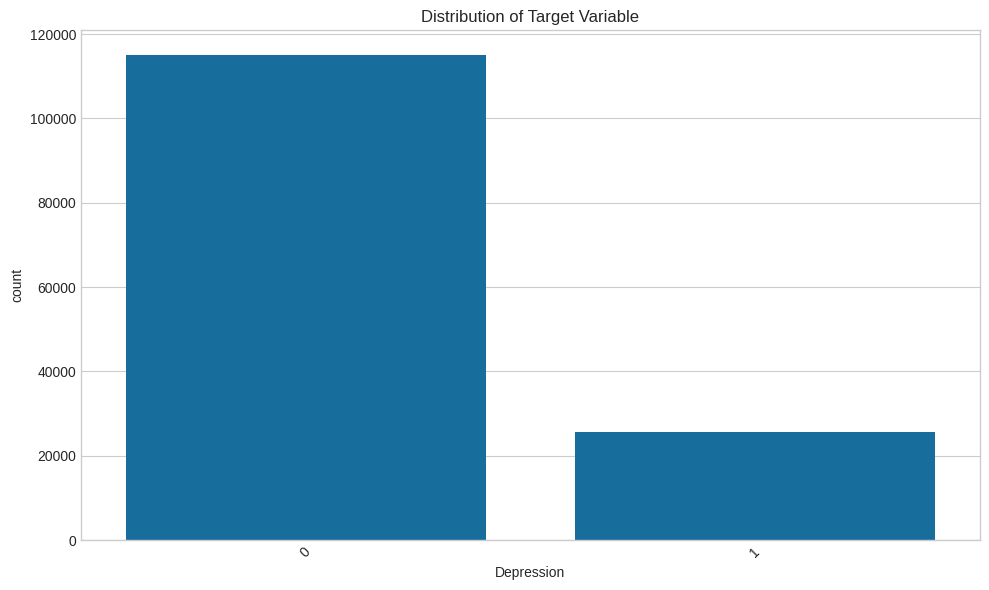


Imbalance ratio (majority:minority): 4.50
The dataset shows class imbalance.


In [7]:
target_column = 'Depression'
print(f"\nTarget column identified as: '{target_column}'")

# Check target distribution
if target_column in df_data.columns:
    print("\n--- Target Variable Distribution ---")
    target_counts = df_data[target_column].value_counts()
    print(target_counts)
    print("\nPercentage distribution:")
    print((target_counts / len(df_data) * 100).round(2))
    
    # Visualize target distribution
    plt.figure(figsize=(10, 6))
    sns.countplot(x=target_column, data=df_data)
    plt.title('Distribution of Target Variable')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig('data_inspection_graphs/target_distribution.png')
    plt.show()

    # Check if classes are imbalanced
    if len(target_counts) > 1:
        imbalance_ratio = target_counts.max() / target_counts.min()
        print(f"\nImbalance ratio (majority:minority): {imbalance_ratio:.2f}")
        if imbalance_ratio > 1.5:
            print("The dataset shows class imbalance.")

#### Missing Values Analysis


--- Missing Values Analysis ---
Columns with missing values:


,Missing Values,Missing Percentage
Academic Pressure,112803,80.173
Study Satisfaction,112803,80.173
CGPA,112802,80.172
Profession,36630,26.034
Work Pressure,27918,19.842
Job Satisfaction,27910,19.837
Dietary Habits,4,0.003
Financial Stress,4,0.003
Degree,2,0.001


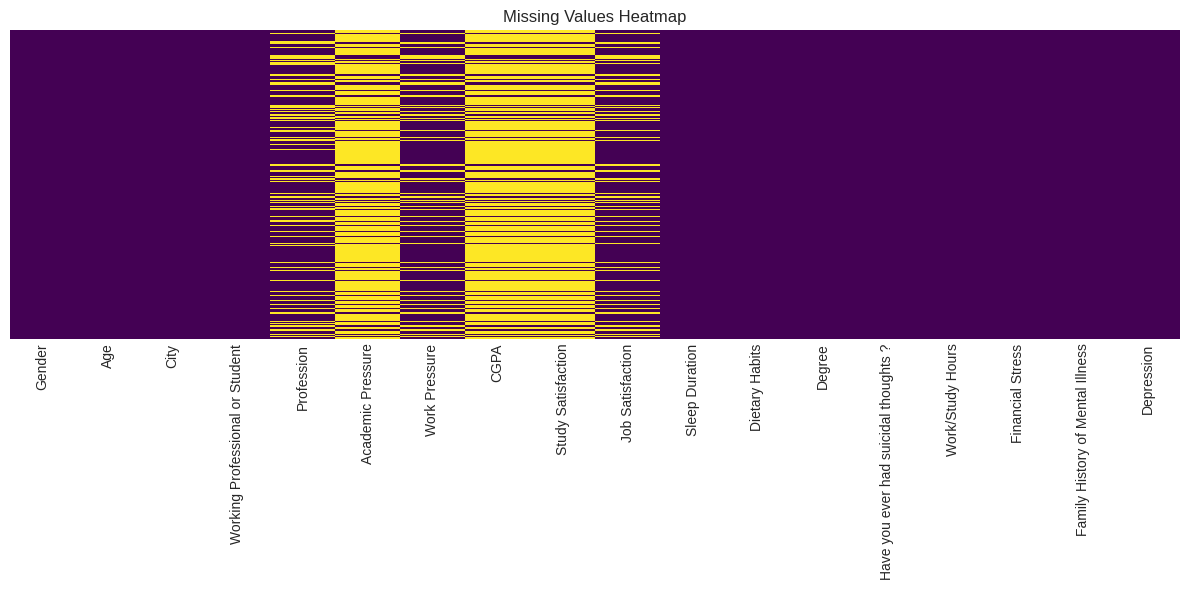

In [8]:
print("\n--- Missing Values Analysis ---")
missing_values = df_data.isnull().sum()
missing_percentage = (missing_values / len(df_data) * 100).round(3)

missing_df = pd.DataFrame({
    'Missing Values': missing_values,
    'Missing Percentage': missing_percentage
})

print("Columns with missing values:")
display(missing_df[missing_df['Missing Values'] > 0].sort_values('Missing Values', ascending=False))

if missing_values.sum() > 0:
    # Visualize missing values
    plt.figure(figsize=(12, 6))
    sns.heatmap(df_data.isnull(), cbar=False, yticklabels=False, cmap='viridis')
    plt.title('Missing Values Heatmap')
    plt.tight_layout()
    plt.savefig('data_inspection_graphs/missing_values_heatmap.png')
    plt.show()

#### Conclusions

From the values presented above, we can see that to some columns there exist a lot of missing values. Having in account the dataset it is normal that this columns does not have values, since a person can be a student or a worker and depending which one certain columns does not make sense to be filled. In order to solve this missing values we decided to aggregate the columns Academic Pressure and Work Pressure in a new column Pressure and do the same to Study Satisfaction and Job Satisfaction. To the others values we replace them with "Invalid"

#### Statistical Summary

In [9]:
print("\n--- Statistical Summary of Numerical Features ---")

# Select only numeric columns
numeric_df = df_data.select_dtypes(include=['int64', 'float64'])

# Get summary statistics and transpose
summary = numeric_df.describe().T

summary = summary.drop(columns=['count'], errors='ignore')  
summary = summary.drop(index='id', errors='ignore')         

# Display the result
display(summary)



--- Statistical Summary of Numerical Features ---


,mean,std,min,25%,50%,75%,max
Age,40.388621,12.384099,18.00,29.00,42.00,51.00,60.0
Academic Pressure,3.142273,1.380457,1.00,2.00,3.00,4.00,5.0
Work Pressure,2.998998,1.405771,1.00,2.00,3.00,4.00,5.0
CGPA,7.658636,1.464466,5.03,6.29,7.77,8.92,10.0
Study Satisfaction,2.944940,1.360197,1.00,2.00,3.00,4.00,5.0
Job Satisfaction,2.974404,1.416078,1.00,2.00,3.00,4.00,5.0
Work/Study Hours,6.252679,3.853615,0.00,3.00,6.00,10.00,12.0
Financial Stress,2.988983,1.413633,1.00,2.00,3.00,4.00,5.0
Depression,0.181713,0.385609,0.00,0.00,0.00,0.00,1.0


#### Feature Distribution and Correlation Analysis

Before we proceed with the feature distribution, we will create a copy of the dataset to avoid modifying the original one. This will allow us to perform various transformations needed for the analysis without affecting the original data.


In [7]:
df_analysis = df_data.copy()

to_convert = ['Academic Pressure', 'Work Pressure', 'Study Satisfaction',
                     'Job Satisfaction', 'Financial Stress']


for col in df_analysis.columns:
    if col in to_convert:
        df_analysis[col] = pd.to_numeric(df_analysis[col], errors='coerce').astype('Int64')



The features can be divided into two categories: **categorical** and **numerical**.
- **Numerical Features**: These features represent continuous values and can be further divided into discrete (integer values) and continuous (real numbers). Examples include `Age`, `Height`, and `Weight`.
- **Categorical Features**: These features represent discrete categories or groups. They can be either ordinal (with a meaningful order) or nominal (without a meaningful order). Examples include `Gender`, `Country`, and `Pressure`.


#### Numerical Features

First, we divide the numerical features into two groups: **discrete** and **continuous**, as these two groups need to be graphed differently. Discrete features are represented by bar plots, while continuous features are represented by histograms. We will also check the correlation between the numerical features and the target variable `Depression` to see if there are any significant relationships.


In [8]:
discrete_features = ['Academic Pressure', 'Work Pressure', 'Study Satisfaction',
                     'Job Satisfaction', 'Financial Stress','Work/Study Hours']


continuous_features = [ 'Age', 'CGPA']


##### Discrete Features

Academic Pressure: 

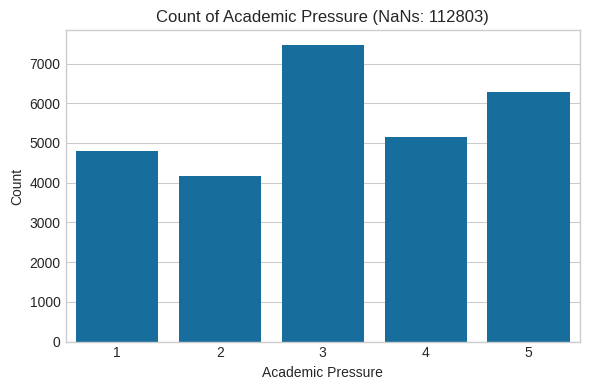

In [9]:
col = discrete_features[0]  # 'Academic Pressure'

# Plot count of values (without hue)
plt.figure(figsize=(6, 4))
sns.countplot(x=col, data=df_analysis)
plt.title(f'Count of {col} (NaNs: {df_analysis[col].isna().sum()})')
plt.xlabel(col)
plt.ylabel('Count')
plt.tight_layout()
plt.savefig('data_inspection_graphs/academic_pressure_count.png')
plt.show()




It is important to note that the majority of students have high academic pressure. 

Work Pressure:

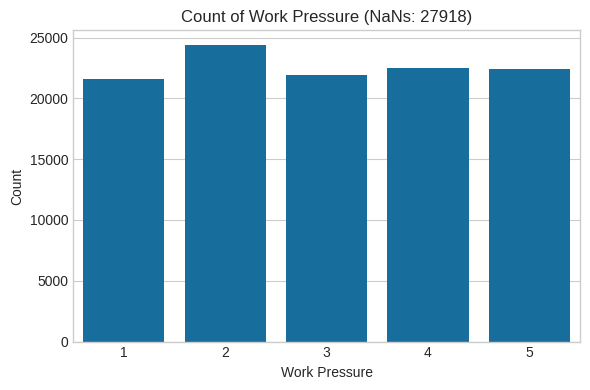

In [10]:
col = discrete_features[1]  # Work Pressure

# Plot count of values (without hue)
plt.figure(figsize=(6, 4))
sns.countplot(x=col, data=df_analysis)
plt.title(f'Count of {col} (NaNs: {df_analysis[col].isna().sum()})')
plt.xlabel(col)
plt.ylabel('Count')
plt.tight_layout()
plt.savefig('data_inspection_graphs/work_pressure_count.png')
plt.show()




Unlike the previous distribution, this one is more balanced, with a significant number of people having low work pressure.

Study Satisfaction:

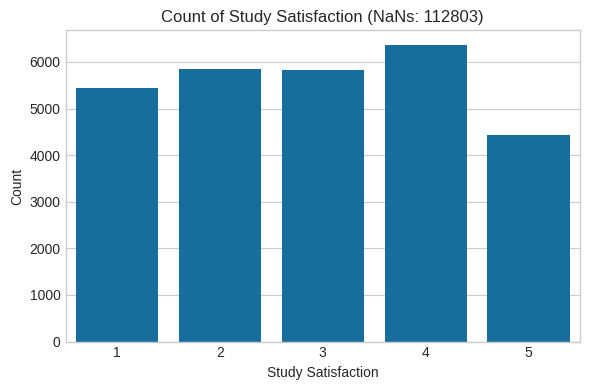

In [11]:
col = discrete_features[2]  #Study Satisfaction

# Plot count of values (without hue)
plt.figure(figsize=(6, 4))
sns.countplot(x=col, data=df_analysis)
plt.title(f'Count of {col} (NaNs: {df_analysis[col].isna().sum()})')
plt.xlabel(col)
plt.ylabel('Count')
plt.tight_layout()
plt.savefig('data_inspection_graphs/study_satisfaction_count.png')
plt.show()




The data is also quite balanced, having a significant number of people with low and high study satisfaction.

Job Satisfaction:

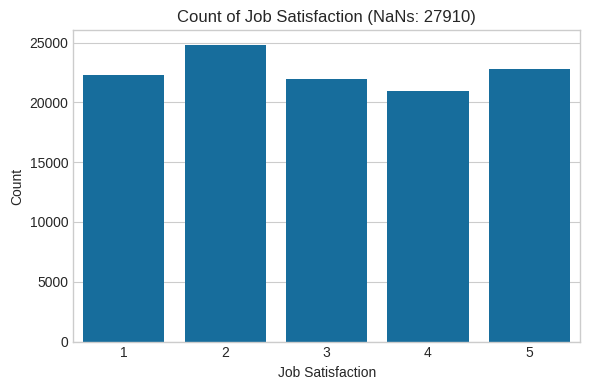

In [12]:
col = discrete_features[3]  # Job Satisfaction

# Plot count of values (without hue)
plt.figure(figsize=(6, 4))
sns.countplot(x=col, data=df_analysis)
plt.title(f'Count of {col} (NaNs: {df_analysis[col].isna().sum()})')
plt.xlabel(col)
plt.ylabel('Count')
plt.tight_layout()
plt.savefig('data_inspection_graphs/job_satisfaction_count.png')
plt.show()




The job satisfaction distribution is similar to the study satisfaction distribution. 

Financial Stress: 

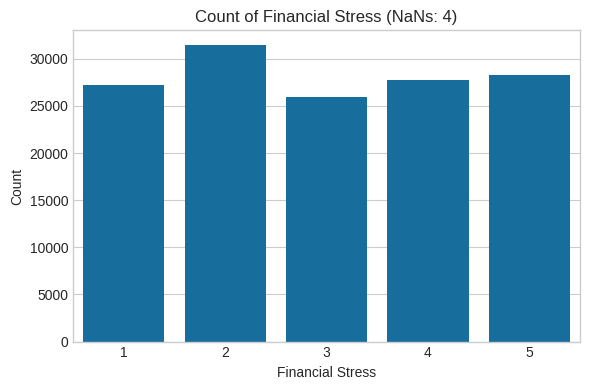

In [13]:
col = discrete_features[4]  # Financial Stress

# Plot count of values (without hue)
plt.figure(figsize=(6, 4))
sns.countplot(x=col, data=df_analysis)
plt.title(f'Count of {col} (NaNs: {df_analysis[col].isna().sum()})')
plt.xlabel(col)
plt.ylabel('Count')
plt.tight_layout()
plt.savefig('data_inspection_graphs/financial_stress_count.png')
plt.show()




The data matches the expected distribution, with a large number of people with depression having high financial stress.


Work / Study Hours:

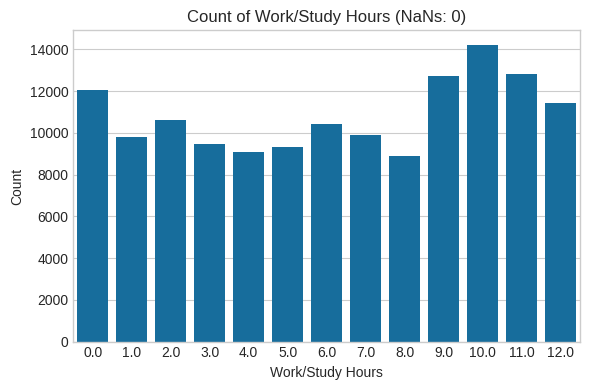

In [14]:
col = discrete_features[5]  # Work/Study Hours

# Plot count of values (without hue)
plt.figure(figsize=(6, 4))
sns.countplot(x=col, data=df_analysis)
plt.title(f'Count of {col} (NaNs: {df_analysis[col].isna().sum()})')
plt.xlabel(col)
plt.ylabel('Count')
plt.tight_layout()
plt.savefig('data_inspection_graphs/work_study_hours_count.png')
plt.show()



We expected to see a rise in depression with more hours worked/studied, which is what we see in the data. 

##### Continuous Features

Age:

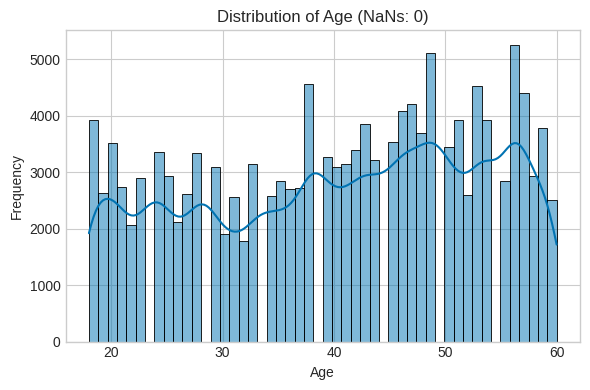

In [15]:
col = continuous_features[0] # Age

plt.figure(figsize=(6, 4))
sns.histplot(df_data[col].dropna(), kde=True)
plt.title(f'Distribution of {col} (NaNs: {df_data[col].isna().sum()})')
plt.xlabel(col)
plt.ylabel('Frequency')
plt.tight_layout()
plt.savefig('data_inspection_graphs/age_distribution.png')
plt.show()



 The distribution is somewhat skewed, with a significant number of people around 50 years old.

CGPA:


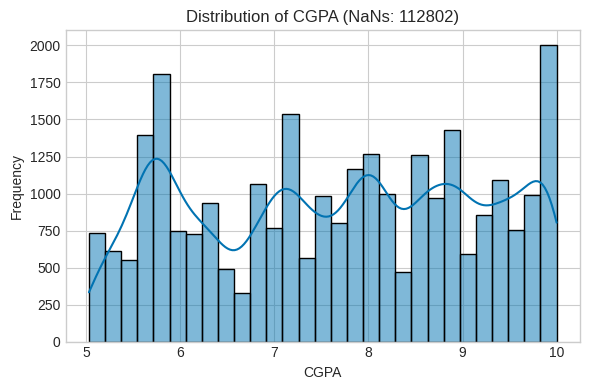

In [16]:
col = continuous_features[1] # CGPA

plt.figure(figsize=(6, 4))
sns.histplot(df_data[col].dropna(), kde=True)
plt.title(f'Distribution of {col} (NaNs: {df_data[col].isna().sum()})')
plt.xlabel(col)
plt.ylabel('Frequency')
plt.tight_layout()
plt.savefig('data_inspection_graphs/cgpa_distribution.png')
plt.show()



The distribution of CGPA is quite balanced.

##### Categorical Features

We start by obtaining categorical features from the dataset. When analyzing these features, we will aggregate the values with very low frequency into a single category called "Other". This will help us to better visualize the data and avoid cluttering the plots with too many categories. We will also check the correlation between the categorical features and the target variable `Depression` to see if there are any significant relationships.

In [10]:
cat_columns = df_data.select_dtypes(include=['object']).columns


Column: Gender - 2 unique values
Gender
Male      77464
Female    63236
Name: count, dtype: int64


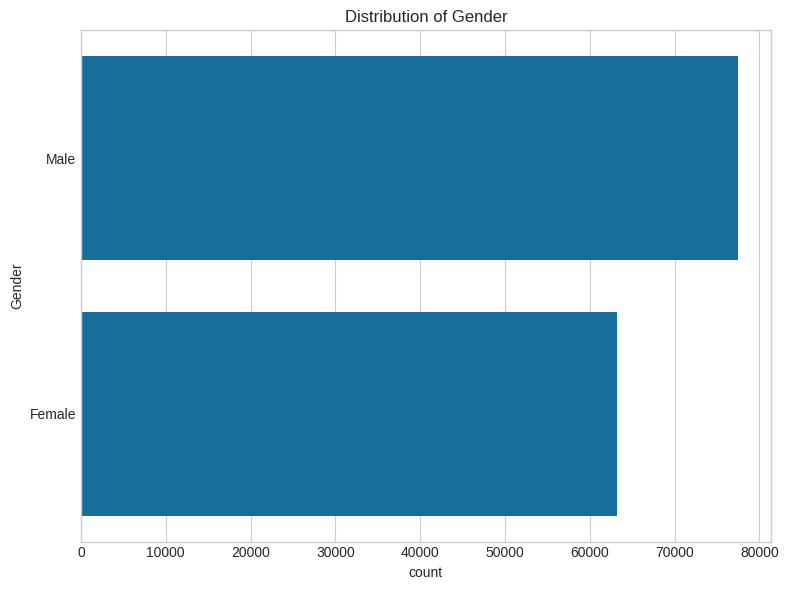

In [19]:
col = cat_columns[0] # gender 

unique_values = df_data[col].nunique()

print(f"\nColumn: {col} - {unique_values} unique values")
value_counts = df_data[col].value_counts()
print(value_counts)

# Plot only the overall count (left plot)
plt.figure(figsize=(8, 6))
sns.countplot(y=col, data=df_data, order=value_counts.index)
plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.savefig('data_inspection_graphs/gender_distribution.png')
plt.show()


It's important to note that we can see a significant disparity in the number of participants based on gender. The number of male participants in the dataset is significantly higher than the number of female participants.

City: 


Column: City - 98 unique values
City
Kalyan         6591
Patna          5924
Vasai-Virar    5765
Kolkata        5689
Ahmedabad      5613
               ... 
Pooja             1
Khushi            1
Khaziabad         1
Jhanvi            1
Unirar            1
Name: count, Length: 98, dtype: int64


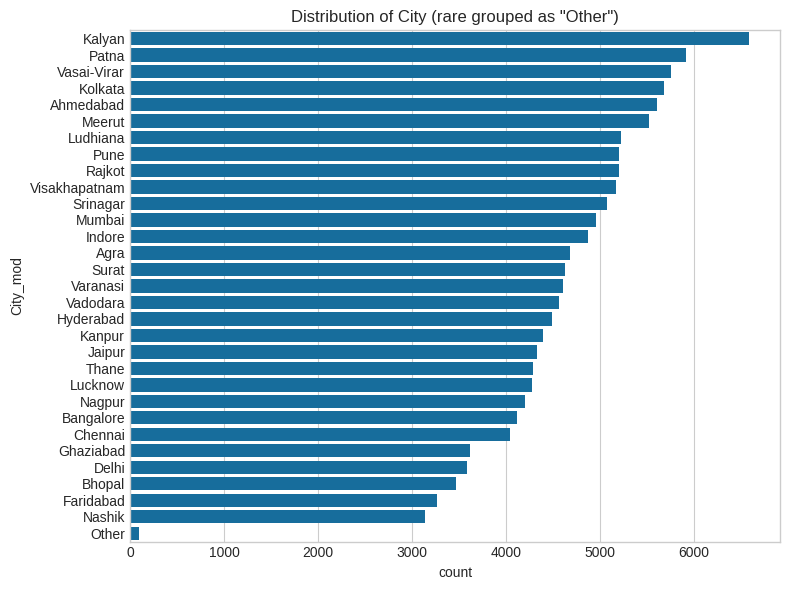

In [20]:
col = cat_columns[1]  # City

# Count unique values
value_counts = df_data[col].value_counts()
print(f"\nColumn: {col} - {value_counts.shape[0]} unique values")
print(value_counts)

threshold = 50  # Set threshold for rare values

df_data[col + '_mod'] = df_data[col].apply(lambda x: x if value_counts[x] >= threshold else 'Other')

mod_value_counts = df_data[col + '_mod'].value_counts()

plt.figure(figsize=(8, 6))
sns.countplot(y=col + '_mod', data=df_data, order=mod_value_counts.index)
plt.title(f'Distribution of {col} (rare grouped as "Other")')
plt.tight_layout()
plt.savefig('data_inspection_graphs/city_distribution.png')
plt.show()


When observing the data, we can see that the majority of participants are from the city of Kalyan. The distribution is quite balanced, with a significant number of participants from other cities as well. 

Working professional vs. Student:


Column: Working Professional or Student - 2 unique values
Working Professional or Student
Working Professional    112799
Student                  27901
Name: count, dtype: int64


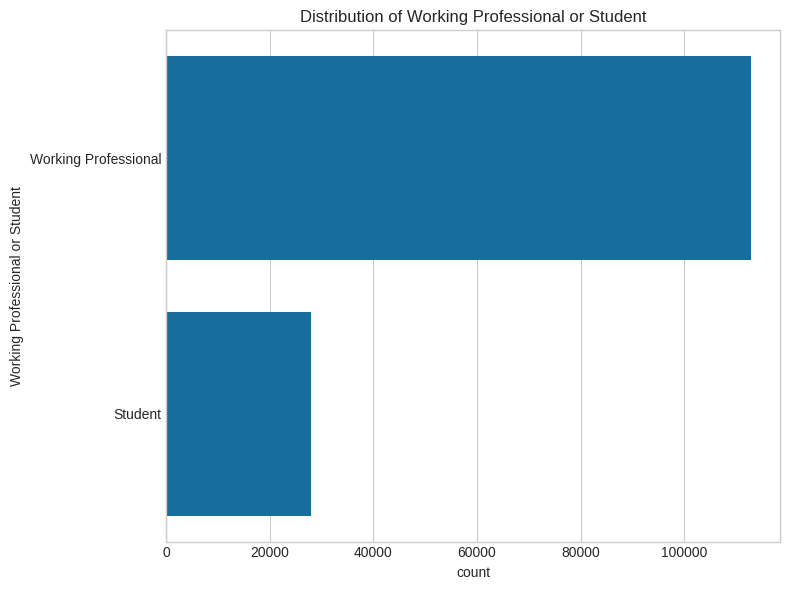

In [21]:
# Select column
col = cat_columns[2]  # e.g., Working professional vs Student

# Print unique value counts
unique_values = df_data[col].nunique()
print(f"\nColumn: {col} - {unique_values} unique values")
value_counts = df_data[col].value_counts()
print(value_counts)

# Plot only the overall count
plt.figure(figsize=(8, 6))
sns.countplot(y=col, data=df_data, order=value_counts.index)
plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.savefig('data_inspection_graphs/working_professional_vs_student_distribution.png')
plt.show()


The distribution is not very balaned, with a significant number of workers in the dataset.

Profession:


Column: Profession - 64 unique values
Profession
Teacher           24906
Content Writer     7814
Architect          4370
Consultant         4229
HR Manager         4022
                  ...  
Moderate              1
Analyst               1
Pranav                1
Visakhapatnam         1
Yuvraj                1
Name: count, Length: 64, dtype: int64


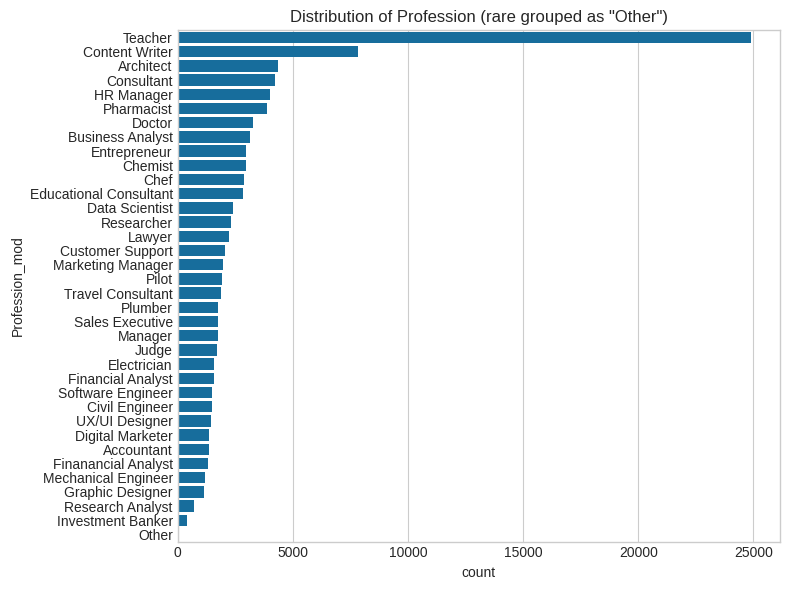

In [22]:
col = cat_columns[3]  # Profession

# Drop NaNs for this analysis
df_nonan = df_data[df_data[col].notna()].copy()

# Count unique values (after dropping NaNs)
value_counts = df_nonan[col].value_counts()
print(f"\nColumn: {col} - {value_counts.shape[0]} unique values")
print(value_counts)

# Threshold for rare values
threshold = 50

# Group rare values as 'Other'
df_nonan[col + '_mod'] = df_nonan[col].apply(lambda x: x if value_counts[x] >= threshold else 'Other')

# Recalculate value counts after modification
mod_value_counts = df_nonan[col + '_mod'].value_counts()

# Plot only the distribution (left plot)
plt.figure(figsize=(8, 6))
sns.countplot(y=col + '_mod', data=df_nonan, order=mod_value_counts.index)
plt.title(f'Distribution of {col} (rare grouped as "Other")')
plt.tight_layout()
plt.savefig('data_inspection_graphs/profession_distribution.png')
plt.show()


The distribution is skewed, with a significant number of participants holding a profession being teachers.

Sleep Duration: 


Column: Sleep Duration - 36 unique values
Sleep Duration
Less than 5 hours    38784
7-8 hours            36969
More than 8 hours    32726
5-6 hours            32142
3-4 hours               12
6-7 hours                8
4-5 hours                7
4-6 hours                5
2-3 hours                5
6-8 hours                4
No                       4
1-6 hours                4
10-11 hours              2
9-11 hours               2
8-9 hours                2
Sleep_Duration           2
Unhealthy                2
45                       2
40-45 hours              1
1-2 hours                1
1-3 hours                1
9-6 hours                1
55-66 hours              1
Moderate                 1
35-36 hours              1
8 hours                  1
10-6 hours               1
Indore                   1
than 5 hours             1
49 hours                 1
Work_Study_Hours         1
3-6 hours                1
45-48 hours              1
9-5                      1
Pune                    

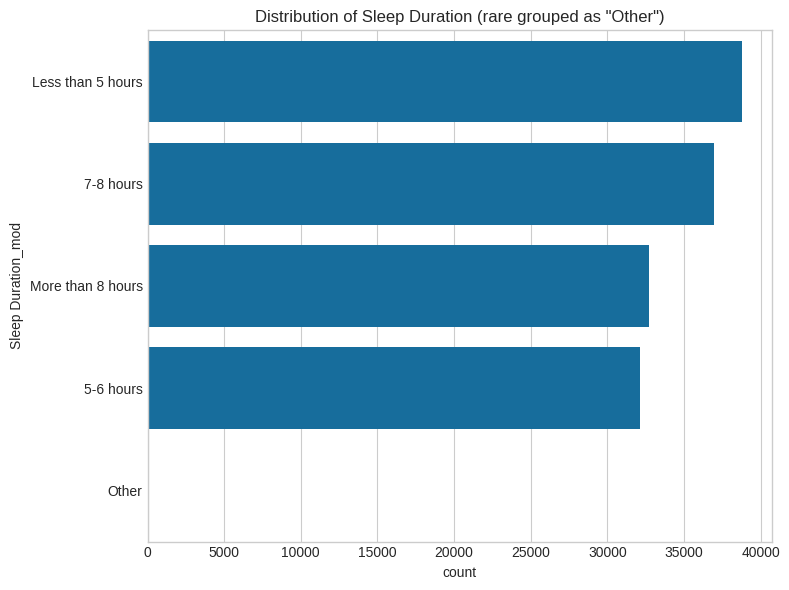

In [23]:
col = cat_columns[4]  # Sleep duration

# Drop NaNs for this analysis
df_nonan = df_data[df_data[col].notna()].copy()

# Count unique values (after dropping NaNs)
value_counts = df_nonan[col].value_counts()
print(f"\nColumn: {col} - {value_counts.shape[0]} unique values")
print(value_counts)

# Threshold for rare values
threshold = 50

# Group rare values as 'Other'
df_nonan[col + '_mod'] = df_nonan[col].apply(lambda x: x if value_counts[x] >= threshold else 'Other')

# Recalculate value counts after modification
mod_value_counts = df_nonan[col + '_mod'].value_counts()

# Plot only the distribution
plt.figure(figsize=(8, 6))
sns.countplot(y=col + '_mod', data=df_nonan, order=mod_value_counts.index)
plt.title(f'Distribution of {col} (rare grouped as \"Other\")')
plt.tight_layout()
plt.savefig('data_inspection_graphs/sleep_duration_distribution.png')
plt.show()


When grouping the values with very low frequency into a single category, we can see that the distribution is quite balanced, with a significant number of participants having a sleep duration of 7-8 hours.




Column: Dietary Habits - 23 unique values
Dietary Habits
Moderate             49705
Unhealthy            46227
Healthy              44741
Yes                      2
More Healthy             2
No                       2
Pratham                  1
Gender                   1
BSc                      1
Less than Healthy        1
3                        1
1.0                      1
Hormonal                 1
Electrician              1
Mihir                    1
No Healthy               1
Less Healthy             1
M.Tech                   1
Vegas                    1
Male                     1
Indoor                   1
Class 12                 1
2                        1
Name: count, dtype: int64


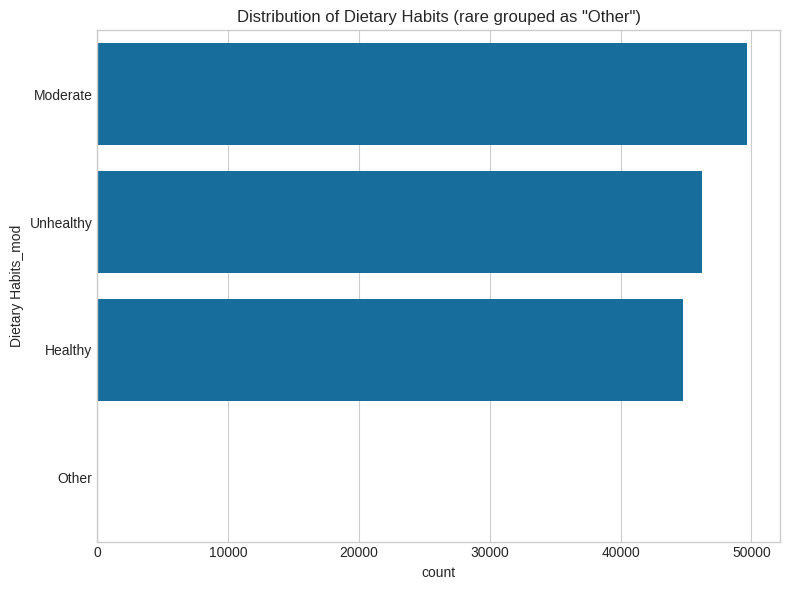

In [24]:
col = cat_columns[5]  # Dietary habits

# Drop NaNs for this analysis
df_nonan = df_data[df_data[col].notna()].copy()

# Count unique values (after dropping NaNs)
value_counts = df_nonan[col].value_counts()
print(f"\nColumn: {col} - {value_counts.shape[0]} unique values")
print(value_counts)

# Threshold for rare values
threshold = 50

# Group rare values as 'Other'
df_nonan[col + '_mod'] = df_nonan[col].apply(lambda x: x if value_counts[x] >= threshold else 'Other')

# Recalculate value counts after modification
mod_value_counts = df_nonan[col + '_mod'].value_counts()

# Plot only the distribution
plt.figure(figsize=(8, 6))
sns.countplot(y=col + '_mod', data=df_nonan, order=mod_value_counts.index)
plt.title(f'Distribution of {col} (rare grouped as \"Other\")')
plt.tight_layout()
plt.savefig('data_inspection_graphs/dietary_habits_distribution.png')
plt.show()


The distribution is quite balanced. 


Degree: 


Column: Degree - 115 unique values
Degree
Class 12    14729
B.Ed        11691
B.Arch       8742
B.Com        8113
B.Pharm      5856
            ...  
LCA             1
B B.Com         1
RCA             1
Mihir           1
Advait          1
Name: count, Length: 115, dtype: int64


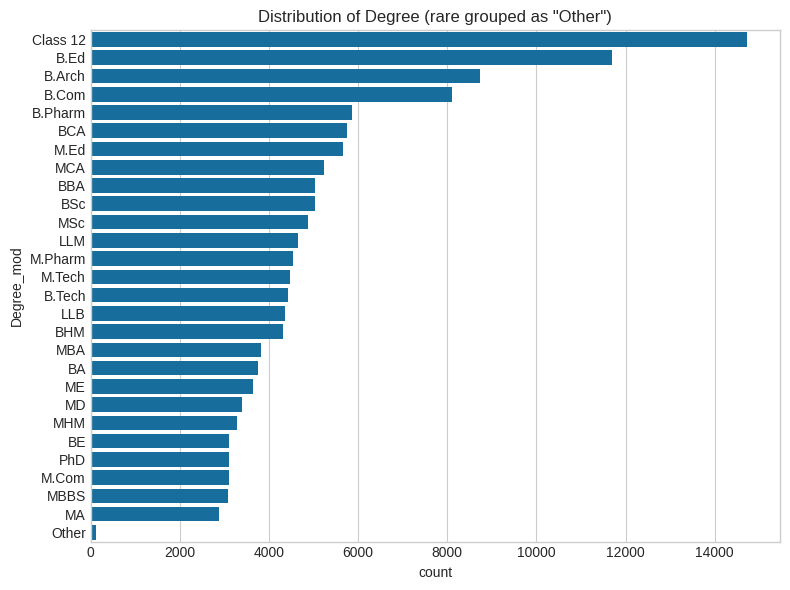

In [25]:
col = cat_columns[6]  # Dietary habits

# Drop NaNs for this analysis
df_nonan = df_data[df_data[col].notna()].copy()

# Count unique values (after dropping NaNs)
value_counts = df_nonan[col].value_counts()
print(f"\nColumn: {col} - {value_counts.shape[0]} unique values")
print(value_counts)

# Threshold for rare values
threshold = 50

# Group rare values as 'Other'
df_nonan[col + '_mod'] = df_nonan[col].apply(lambda x: x if value_counts[x] >= threshold else 'Other')

# Recalculate value counts after modification
mod_value_counts = df_nonan[col + '_mod'].value_counts()

# Plot only the distribution
plt.figure(figsize=(8, 6))
sns.countplot(y=col + '_mod', data=df_nonan, order=mod_value_counts.index)
plt.title(f'Distribution of {col} (rare grouped as \"Other\")')
plt.tight_layout()
plt.savefig('data_inspection_graphs/dietary_habits_2_distribution.png')
plt.show()


When analyzing the degree distribution, we can see a significant number of participants with Class 12 and a significant number of participants with a Bachelor's degree. The distribution is quite balanced, with a significant number of participants with other degrees as well.

Have you ever had suicidal thoughts?:


Column: Have you ever had suicidal thoughts ? - 2 unique values
Have you ever had suicidal thoughts ?
No     71138
Yes    69562
Name: count, dtype: int64


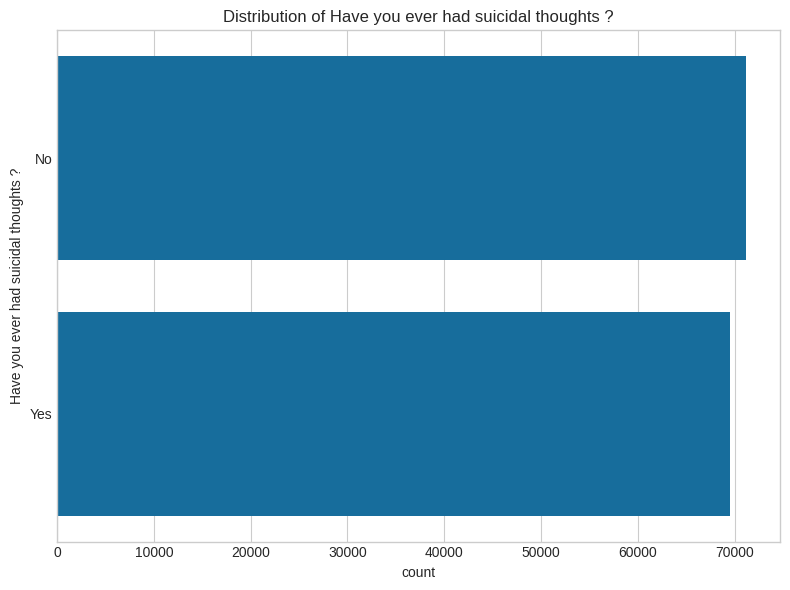

In [26]:
# Select column
col = cat_columns[7]  # Have you ever had suicidal thoughts?

# Print unique value counts
unique_values = df_data[col].nunique()
print(f"\nColumn: {col} - {unique_values} unique values")
value_counts = df_data[col].value_counts()
print(value_counts)

# Plot only the overall count
plt.figure(figsize=(8, 6))
sns.countplot(y=col, data=df_data, order=value_counts.index)
plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.savefig('data_inspection_graphs/suicidal_thoughts_distribution.png')
plt.show()


The distribution is very balanced, with the amount of people with and without suicidal thoughts being almost equal.

History of mental illness in family:


Column: Family History of Mental Illness - 2 unique values
Family History of Mental Illness
No     70758
Yes    69942
Name: count, dtype: int64


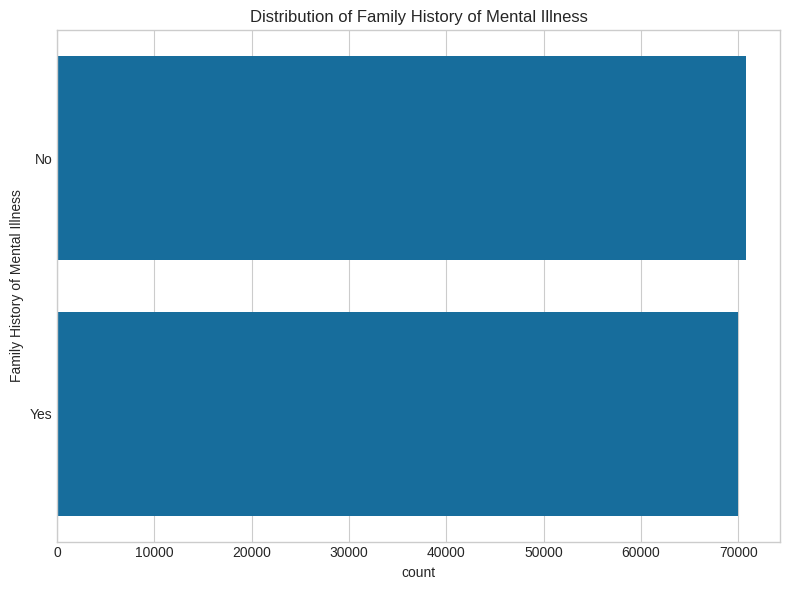

In [27]:
# Select column
col = cat_columns[8]  # History of mental illness in family

# Print unique value counts
unique_values = df_data[col].nunique()
print(f"\nColumn: {col} - {unique_values} unique values")
value_counts = df_data[col].value_counts()
print(value_counts)

# Plot only the overall count
plt.figure(figsize=(8, 6))
sns.countplot(y=col, data=df_data, order=value_counts.index)
plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.savefig('data_inspection_graphs/history_mental_illness_distribution.png')
plt.show()


The distribution is quite balanced, with a significant number of participants having a history of mental illness in their family.

### Conclusions
Has seen above, certain columns have values that are not much representative and could give wrong information to the model. In order to solve that, we are going to eliminate that lines in the preprocessing phase.

The following columns are going to be modified:
- **Sleep Duration**: Only the top 4 values are going to be valid (Less than 5 hours, 7-8 hours, More than 8 hours, 5-6 hours).
- **Dietary Habits**: Only the top 3 values are going to be valid (Moderate, Unhealthy, Healthy).

On total from this modifications are going to be removed a total of **106 lines**, representing **0,075%** of the dataset.

##### Correlation Analysis

Numerical Features: 


--- Correlation Analysis ---


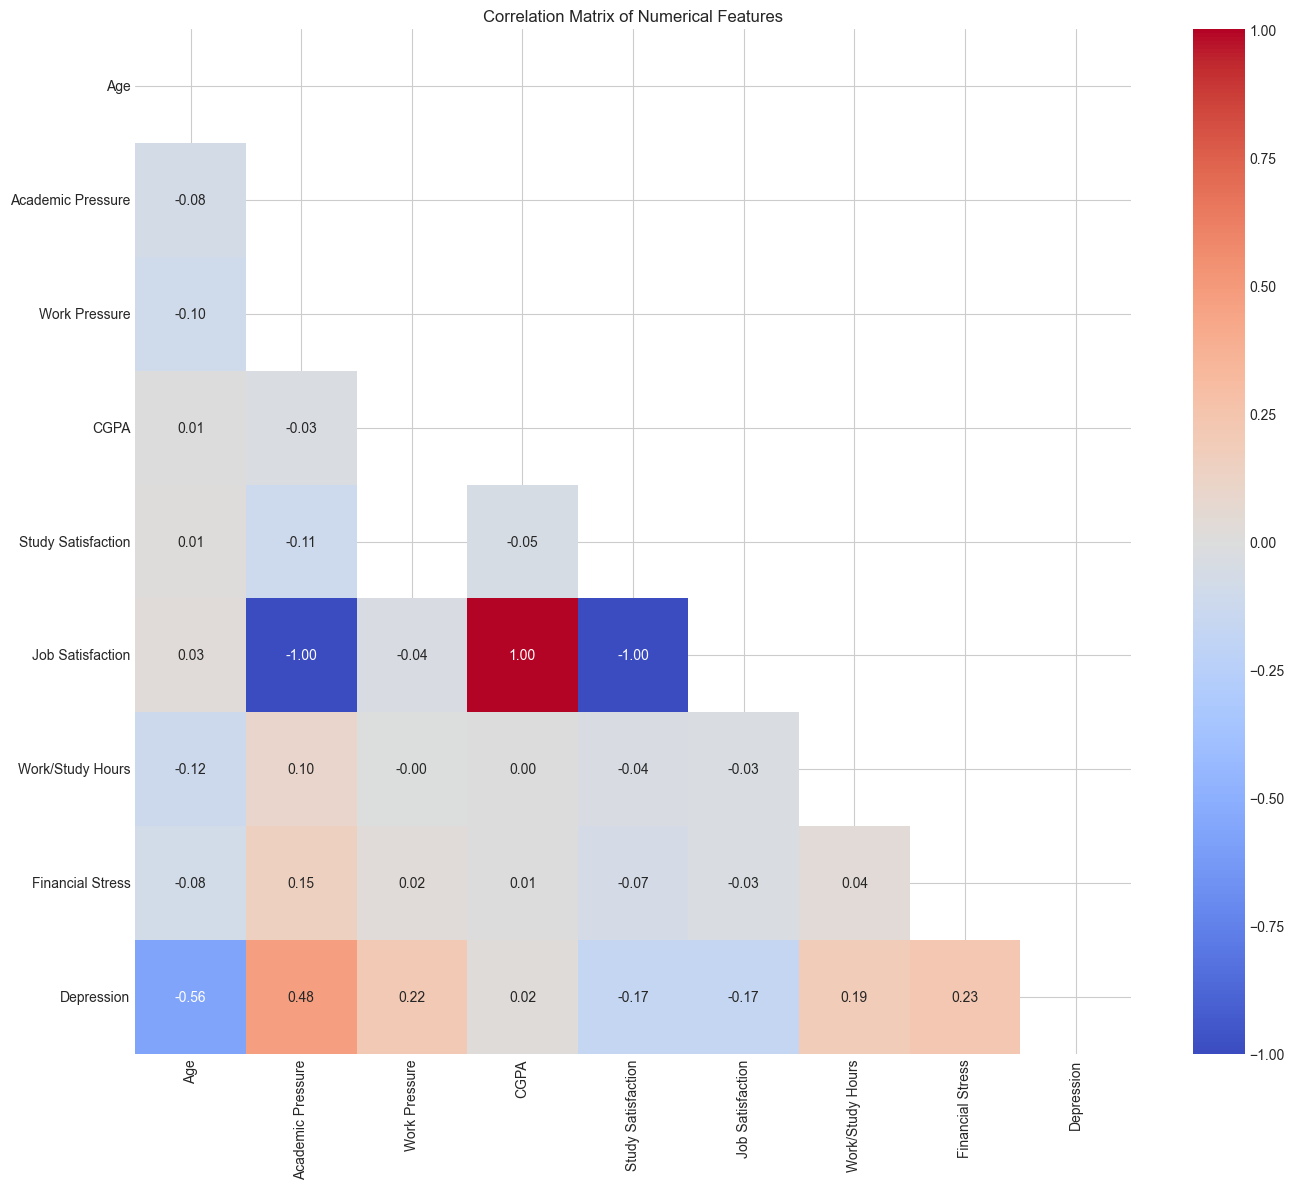


Feature correlation with target:
Depression            1.000000
Age                  -0.564671
Academic Pressure     0.475037
Financial Stress      0.227237
Work Pressure         0.216634
Work/Study Hours      0.191746
Job Satisfaction     -0.168543
Study Satisfaction   -0.168014
CGPA                  0.021729
Name: Depression, dtype: float64


In [14]:
if len(numeric_df.columns) > 1:
        print("\n--- Correlation Analysis ---")
        corr_matrix = numeric_df.corr()
        
        plt.figure(figsize=(14, 12))
        mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
        sns.heatmap(corr_matrix, annot=True, mask=mask, cmap='coolwarm', fmt='.2f')
        plt.title('Correlation Matrix of Numerical Features')
        plt.tight_layout()
        plt.savefig('data_inspection_graphs/correlation_matrix.png')
        plt.show()
        
        # If target is numerical, display correlation with target
        if target_column in numeric_df.columns:
            target_corr = corr_matrix[target_column].reindex(
                corr_matrix[target_column].abs().sort_values(ascending=False).index
            )
            print("\nFeature correlation with target:")
            print(target_corr)

For the numerical features, we can observe that the most impactful features when predicting depression are age, followed by academic pressure. All other features are about equally impactful, with the exception of CGPA that is not very impactful.

The main takeaways from the correlation analysis are:

- **Age**: The younger the person, the more likely they are to suffer from depression.
- **Academic Pressure**: The more academic pressure a person has, the more likely they are to suffer from depression.
- **Work Pressure**: The more work pressure a person has, the more likely they are to suffer from depression.
- **Study Satisfaction**: The more satisfied a person is with their studies, the less likely they are to suffer from depression.
- **Job Satisfaction**: The more satisfied a person is with their job, the less likely they are to suffer from depression.
- **Financial Stress**: The more financial stress a person has, the more likely they are to suffer from depression.
- **Work/Study Hours**: The more hours a person works/studies, the more likely they are to suffer from depression.
- **CGPA**: Barely any correlation with depression.


In [1]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1)) / (n-1))
    rcorr = r - ((r-1)**2) / (n-1)
    kcorr = k - ((k-1)**2) / (n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

def point_biserial_corr(binary_col, numeric_col):
    # Encode binary categorical column to 0/1
    le = LabelEncoder()
    binary_encoded = le.fit_transform(binary_col.dropna())
    # Align numeric column to non-NaN of binary_col
    numeric_aligned = numeric_col[binary_col.notna()]
    corr, pval = pointbiserialr(binary_encoded, numeric_aligned)
    return corr, pval

def anova_f_value(cat_col, numeric_col):
    # Drop NaNs for aligned samples
    df_temp = pd.DataFrame({'cat': cat_col, 'num': numeric_col}).dropna()
    groups = [group["num"].values for name, group in df_temp.groupby("cat")]
    if len(groups) > 1:
        f_stat, p_val = f_oneway(*groups)
        return f_stat, p_val
    else:
        return np.nan, np.nan
    


--- Categorical vs Categorical (Cramér's V Matrix) ---


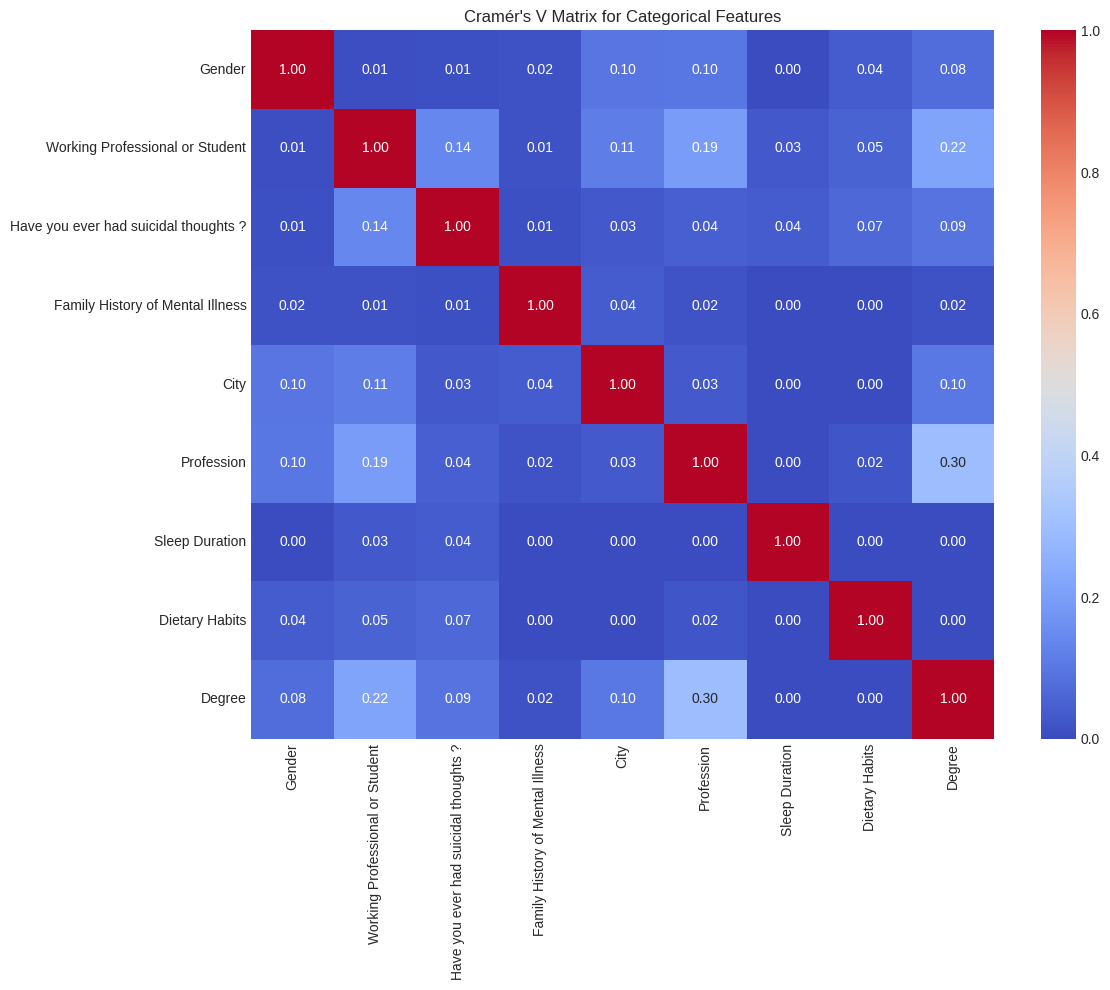


--- Binary Categorical vs Numeric Target Correlation ---
Gender vs Depression: point-biserial corr = 0.008, p-value = 0.002
Working Professional or Student vs Depression: point-biserial corr = -0.521, p-value = 0.000
Have you ever had suicidal thoughts ? vs Depression: point-biserial corr = 0.349, p-value = 0.000
Family History of Mental Illness vs Depression: point-biserial corr = 0.017, p-value = 0.000

--- Non-Binary Categorical vs Numeric Target ANOVA ---
City vs Depression: ANOVA F = 11.677, p-value = 0.000
Profession vs Depression: ANOVA F = 22.898, p-value = 0.000
Sleep Duration vs Depression: ANOVA F = 35.453, p-value = 0.000
Dietary Habits vs Depression: ANOVA F = 152.153, p-value = 0.000
Degree vs Depression: ANOVA F = 127.387, p-value = 0.000


In [18]:
binary_categorical = []
non_binary_categorical = []

for col in cat_columns:
    unique_vals = df_data[col].dropna().unique()
    if len(unique_vals) == 2:
        binary_categorical.append(col)
    else:
        non_binary_categorical.append(col)

# --- Categorical vs Categorical (Cramér's V) Matrix ---

print("\n--- Categorical vs Categorical (Cramér's V Matrix) ---")
cat_all = binary_categorical + non_binary_categorical
cramers_matrix = pd.DataFrame(index=cat_all, columns=cat_all)

for col1 in cat_all:
    for col2 in cat_all:
        if col1 == col2:
            cramers_matrix.loc[col1, col2] = 1.0
        else:
            cramers_matrix.loc[col1, col2] = cramers_v(df_data[col1], df_data[col2])

cramers_matrix = cramers_matrix.astype(float)

plt.figure(figsize=(12, 10))
sns.heatmap(cramers_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Cramér's V Matrix for Categorical Features")
plt.tight_layout()
plt.show()

# --- Binary Categorical vs Numeric Target (Point-Biserial Correlation) ---

print("\n--- Binary Categorical vs Numeric Target Correlation ---")
for col in binary_categorical:
    if target_column in numeric_df.columns:
        corr, pval = point_biserial_corr(df_data[col], numeric_df[target_column])
        print(f"{col} vs {target_column}: point-biserial corr = {corr:.3f}, p-value = {pval:.3f}")

# --- Non-Binary Categorical vs Numeric Target (ANOVA) ---

print("\n--- Non-Binary Categorical vs Numeric Target ANOVA ---")
for col in non_binary_categorical:
    if target_column in numeric_df.columns:
        f_val, p_val = anova_f_value(df_data[col], numeric_df[target_column])
        if not np.isnan(f_val):
            print(f"{col} vs {target_column}: ANOVA F = {f_val:.3f}, p-value = {p_val:.3f}")

Observing the binary features, we can see that the most impactful features when predicting depression are Working Professional or Student and Have you ever had suicidal thoughts?. 

The main takeaways from the correlation analysis are:
- **Working Professional or Student**: Students are more likely to suffer from depression than working professionals.
- **Have you ever had suicidal thoughts?**: People who have had suicidal thoughts are more likely to suffer from depression.
- **History of mental illness in family**: People who have a history of mental illness in their family are more likely to suffer from depression, although the correlation is not very strong.
- **Gender**: Barely any correlation with depression.

Observing the non binary categorical features, we can see that the most impactful features when predicting depression are Dietary Habits and Degree.

## 2. Problem Definition and Targe Variable

The problem we are addressing is the detection of depression based on individual lifestyle, academic/professional, and demographic information. Using the survey data previously described, which includes features such as sleep duration, dietary habits, satisfaction levels, and stress factors, our goal is to predict **whether a person is likely to suffer from depression or not**.

The target variable for this classification task is the `Depression` column, where:

- `1` indicates signs of depression

- `0` indicates no signs of depression

With that in mind, we will take use of supervised learning models to identify patterns and make accurate predictions based on the input features.

## 3. Data Preprocessing

Based on our EDA findings, we can now preprocess the data for machine learning.

### Initial Filtering Based on EDA Findings
Filter the dataset to retain only the most frequent values of key features:

In [191]:
if df_data is not None:
    print("\n--- Data Preprocessing ---")

    print(df_data['Sleep Duration'].value_counts().head(6))
    print(df_data['Dietary Habits'].value_counts().head(6))

    # Keep `Less than 5 hours`, `7-8 hours`, `More than 8 hours`, `5-6 hours`
    top4_sleep = df_data['Sleep Duration'].value_counts().nlargest(4).index

    # Keep `Moderate`, `Unhealthy`, `Healthy`
    top3_diet = df_data['Dietary Habits'].value_counts().nlargest(3).index

    df_data = df_data[
        df_data['Sleep Duration'].isin(top4_sleep) & 
        df_data['Dietary Habits'].isin(top3_diet)
    ]

    print(df_data.shape)


--- Data Preprocessing ---
Sleep Duration
Less than 5 hours    38784
7-8 hours            36969
More than 8 hours    32726
5-6 hours            32142
3-4 hours               12
6-7 hours                8
Name: count, dtype: int64
Dietary Habits
Moderate        49705
Unhealthy       46227
Healthy         44741
Yes                 2
More Healthy        2
No                  2
Name: count, dtype: int64
(140594, 20)


#### **Justification**
Based on our exploration of the dataset, we observed that some categories in the `Sleep Duration` and `Dietary Habits` features had very low frequencies. To ensure we focus on the most relevant and statistically significant groups, we retained only the top 4 most common sleep durations and top 3 dietary habits. This helps reduce noise and improve the model's ability to generalize from meaningful patterns.

### Feature Engineering: Satisfaction and Pressure
Combining and imputing `satisfaction` and `pressure` based on whether the respondent is a student or professional:

In [192]:
df_data["Satisfaction"] = df_data.apply(
    lambda row: row["Job Satisfaction"] if row['Working Professional or Student'] == 'Working Professional' 
    else row['Study Satisfaction'], axis=1)


is_working_professional = df_data['Working Professional or Student'] == 'Working Professional'
is_student = df_data['Working Professional or Student'] == 'Student'


mean_satisfaction_professional = df_data[
(is_working_professional) &
(df_data["Satisfaction"].notna())
]["Satisfaction"].mean()

print(f"Mean professional satisfaction: {mean_satisfaction_professional}")

# Round to 0 decimals (Values varying from 1 to 5)
mean_satisfaction_professional = round(mean_satisfaction_professional)

# Fill missing values in Satisfaction for working professionals
df_data.loc[
(is_working_professional) &
(df_data["Satisfaction"].isna()),
"Satisfaction"
] = mean_satisfaction_professional

print(f"Missing values in Satisfaction: {df_data["Satisfaction"].isna().sum()}")

mean_satisfaction_student = df_data[
(is_student) &
(df_data["Satisfaction"].notna())
]["Satisfaction"].mean()

print(f"Mean student satisfaction: {mean_satisfaction_student}")


mean_satisfaction_student = round(mean_satisfaction_student)



# Fill missing values in Satisfaction for students
df_data.loc[
(is_student) &
(df_data["Satisfaction"].isna()),
"Satisfaction"
] = mean_satisfaction_student


print(f"Missing values in Satisfaction: {df_data["Satisfaction"].isna().sum()}")
# Confirm filled values are correct
print(df_data["Satisfaction"].value_counts().sort_index())

df_data.drop(columns=['Job Satisfaction', 'Study Satisfaction'], inplace=True)


df_data['Pressure'] = df_data.apply(
    lambda row: row['Work Pressure'] if row['Working Professional or Student'] == 'Working Professional' 
    else row['Academic Pressure'], axis=1)


mean_pressure_professional = df_data[
(is_working_professional) &
(df_data["Pressure"].notna())
]["Pressure"].mean()


print(f"Mean professional pressure: {mean_pressure_professional}")
# Round to 0 decimals (Values varying from 1 to 5)
mean_pressure_professional = round(mean_pressure_professional)

# Fill missing values in Pressure for working professionals
df_data.loc[
(is_working_professional) &
(df_data["Pressure"].isna()),
"Pressure"
] = mean_pressure_professional

print(f"Missing values in Pressure: {df_data["Pressure"].isna().sum()}")

mean_pressure_student = df_data[
(is_student) &
(df_data["Pressure"].notna())
]["Pressure"].mean()

print(f"Mean student pressure: {mean_pressure_student}")


mean_pressure_student = round(mean_pressure_student)


# Fill missing values in Pressure for students
df_data.loc[
(is_student) &
(df_data["Pressure"].isna()),
"Pressure"
] = mean_pressure_student

print(f"Missing values in Pressure: {df_data["Pressure"].isna().sum()}")
# Confirm filled values are correct
print(df_data["Pressure"].value_counts().sort_index())    

df_data.drop(columns=['Work Pressure', 'Academic Pressure'], inplace=True)


Mean professional satisfaction: 2.9745621351125937
Missing values in Satisfaction: 10
Mean student satisfaction: 2.9445820322314344
Missing values in Satisfaction: 0
Satisfaction
1.0    27754
2.0    30589
3.0    27780
4.0    27256
5.0    27215
Name: count, dtype: int64
Mean professional pressure: 2.999050602024791
Missing values in Pressure: 9
Mean student pressure: 3.142236738209748
Missing values in Pressure: 0
Pressure
1.0    26346
2.0    28526
3.0    29362
4.0    27646
5.0    28714
Name: count, dtype: int64


#### **Justification**
The dataset separates satisfaction and pressure into two different columns depending on whether the person is a student or a working professional. To unify the representation and simplify modeling, we created a single `Satisfaction` and `Pressure` column by merging the appropriate values. Additionally, we imputed missing values using the mean of their respective groups (students or professionals), as this preserves group-specific trends and avoids introducing bias across categories.

### Missing Value Imputation for Other Features
Handle missing values in `CGPA`, `profession`, `dietary habits`, `financial stress`, and `degree`:

In [ ]:
# Impute missing CGPA values only if the person is a student
df_data.loc[is_student, 'CGPA'] = df_data.loc[is_student, 'CGPA'].fillna(df_data['CGPA'].median())

df_data.loc[is_working_professional, 'CGPA'] = df_data.loc[is_working_professional, 'CGPA'].fillna(-1)

df_data.loc[is_student, 'Profession'] = df_data.loc[is_student, 'Profession'].fillna("Student")

df_data.loc[is_working_professional, 'Profession'] = df_data.loc[is_working_professional, 'Profession'].fillna("Unemployed")

df_data['Dietary Habits'] = df_data['Dietary Habits'].fillna(df_data['Dietary Habits'].mode()[0])

df_data['Financial Stress'] = df_data['Financial Stress'].fillna(df_data['Financial Stress'].median())

df_data['Degree'] = df_data['Degree'].fillna("None")

#### **Justification**
During EDA, we identified missing values in features like `CGPA`, `Profession`, `Dietary Habits`, `Financial Stress`, and `Degree`. To handle these:

- We imputed `CGPA` only for students using the median to avoid skewing the distribution.

- `Missing Profession` entries for professionals were filled with **"Unemployed"** to indicate lack of a job.

- `Dietary Habits` used the **mode** to preserve the most likely category.

- `Financial Stress` was filled with the **median** to avoid influence from extreme values.

- `Degree missing` entries were labeled as **"None"** to retain the information that no degree was declared.

### Target Separation and Feature Dropping
Prepare data for training:

In [ ]:
X = df_data.drop(columns=['Depression'])  # Drop target column
y = df_data['Depression']  # Column to predict

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#### **Justification**
Since the goal is to predict the likelihood of depression, we separated the target variable `Depression` from the feature set. We also dropped identifiers like `id` and `Name` as they are not relevant for prediction and could introduce bias or overfitting if kept.

### Categorical Variable Encoding
Transform `binary`, `ordinal`, and `nominal` categorical variables:

In [ ]:

binary_cols = [
    'Gender',
    'Have you ever had suicidal thoughts ?',
    'Family History of Mental Illness',
    'Working Professional or Student'
]

# Enum values
ordinal_cols = {
    'Sleep Duration': {
        'Less than 5 hours': 0,
        '5-6 hours': 1,
        '7-8 hours': 2,
        'More than 8 hours': 3
    },
    'Dietary Habits': {
        'Unhealthy': 0,
        'Moderate': 1,
        'Healthy': 2
    }
}

nominal_cols = [
    'City',
    'Profession',
    'Degree'
]

binary_map = {'Yes': 1, 'No': 0, 'Male': 1, 'Female': 0, 'Working Professional' : 1 ,'Student' : 0}

for col in binary_cols:
    X_train[col] = X_train[col].map(binary_map)
    X_test[col] = X_test[col].map(binary_map)

for col, mapping in ordinal_cols.items():
    X_train[col] = X_train[col].map(mapping)
    X_test[col] = X_test[col].map(mapping)


encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Fit on training data
encoder.fit(X_train[nominal_cols])

# Transform both sets
X_train_encoded = encoder.transform(X_train[nominal_cols])
X_test_encoded = encoder.transform(X_test[nominal_cols])

# Create DataFrames
encoded_cols = encoder.get_feature_names_out(nominal_cols)
X_train_encoded = pd.DataFrame(X_train_encoded, columns=encoded_cols, index=X_train.index)
X_test_encoded = pd.DataFrame(X_test_encoded, columns=encoded_cols, index=X_test.index)

# Drop original nominal columns and add encoded ones
X_train = X_train.drop(columns=nominal_cols).join(X_train_encoded)
X_test = X_test.drop(columns=nominal_cols).join(X_test_encoded)

print(X_train.shape)
print(X_test.shape)

(112475, 259)
(28119, 259)


#### **Justification**
Many machine learning algorithms cannot handle categorical values directly. Based on the types of variables identified during EDA:

- **Binary variables** were mapped to 0/1 to allow direct numerical interpretation.

- **Ordinal variables** like `Sleep Duration` and `Dietary Habits` were mapped based on their logical order (e.g., unhealthy < moderate < healthy).

- **Nominal variables** like `City`, `Profession`, and `Degree` were one-hot encoded to represent each category as a separate feature, avoiding any implied order.

### Feature Scaling
Standardize numerical features to improve model performance:

In [ ]:
scaler = StandardScaler()

# Fit the scaler on the training set and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test set 
X_test_scaled = scaler.transform(X_test)

# Convert scaled data back into a DataFrame
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

# Replace the original numerical columns with the scaled ones
X_train = X_train_scaled
X_test = X_test_scaled

Empty DataFrame
Columns: [Gender, Age, Working Professional or Student, CGPA, Sleep Duration, Dietary Habits, Have you ever had suicidal thoughts ?, Work/Study Hours, Financial Stress, Family History of Mental Illness, Satisfaction, Pressure, City_3.0, City_Aaradhya, City_Agra, City_Ahmedabad, City_Aishwarya, City_Anvi, City_Armaan, City_Atharv, City_Ayansh, City_Ayush, City_Bangalore, City_Bhavna, City_Bhopal, City_Chennai, City_Chhavi, City_City, City_Delhi, City_Faridabad, City_Gaurav, City_Ghaziabad, City_Gurgaon, City_Harsha, City_Hyderabad, City_Indore, City_Ishkarsh, City_Itheg, City_Ivaan, City_Jaipur, City_Jhanvi, City_Kagan, City_Kalyan, City_Kanpur, City_Kashk, City_Keshav, City_Khaziabad, City_Kibara, City_Kolkata, City_Krinda, City_Krishna, City_Less Delhi, City_Less than 5 Kalyan, City_Lucknow, City_Ludhiana, City_M.Com, City_M.Tech, City_MCA, City_ME, City_Mahi, City_Meerut, City_Mihir, City_Mira, City_Molkata, City_Moreadhyay, City_Morena, City_Mumbai, City_Nagpur, City

#### **Justification**
EDA revealed that features have different scales (e.g., CGPA vs binary values). To ensure that no feature dominates due to its magnitude, we applied standardization using `StandardScaler`.

### Saving Processed Data for Later Use
After completing the data preprocessing, we save the resulting training and testing sets. This allows us to avoid repeating the preprocessing pipeline and ensures consistency when training or evaluating models at a later stage.

In [ ]:
# Change this if u want to run this
needed = False
if needed:
    X_train.to_csv("processed_data/X_train.csv", index=True)
    X_test.to_csv("processed_data/X_test.csv", index=True)
    y_train.to_csv("processed_data/y_train.csv", index=True)
    y_test.to_csv("processed_data/y_test.csv", index=True)

## 4. Model Training and Testing
After preprocessing, we trained and evaluated multiple supervised learning algorithms to identify the best-performing model for predicting depression.

#### Load Processed Data
If needed, so as to not run the code all over again we stored the processed data in csv files.

In [35]:
# Reload the processed data if needed
needed = True
if needed:
    print("Reloading pre-processed data")
    X_train = pd.read_csv("processed_data/X_train.csv", index_col=0)
    X_test = pd.read_csv("processed_data/X_test.csv", index_col=0)
    y_train = pd.read_csv("processed_data/y_train.csv", index_col=0).squeeze()
    y_test = pd.read_csv("processed_data/y_test.csv", index_col=0).squeeze()



Reloading pre-processed data


#### Models Used
We applied **Decision Tree**, **k-Nearest Neighbors**, and **SVM** based on the recommended algorithms pointed on the document. Additionally, we included more advanced ensemble and gradient boosting models such as **LightGBM**, **CatBoost**, and **Random Forest** to enhance predictive performance.

In [36]:
dt_model = DecisionTreeClassifier(random_state=42)
knn_model = KNeighborsClassifier(n_neighbors=5)
svm_model = SVC(kernel='rbf', random_state=42)
lgbm_model = LGBMClassifier(random_state=42)
catboost_model = CatBoostClassifier(verbose=0, random_state=42)
rf_model = RandomForestClassifier(random_state=42)

###  Decision Tree Classifier
A tree-based model that splits the data using decision rules inferred from the features. It's interpretable and handles both categorical and numerical data.

In [52]:
# Cross-validation scores
cv_scores_dt = cross_val_score(dt_model, X_train, y_train, cv=5, scoring='accuracy')

# Train
start_train = time.time()
dt_model.fit(X_train, y_train)
train_time_dt = time.time() - start_train

# Test
start_test = time.time()
y_pred_dt = dt_model.predict(X_test)
test_time_dt = time.time() - start_test

# Evaluation
print("Decision Tree Results:")
print(classification_report(y_test, y_pred_dt))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt))

Decision Tree Results:
              precision    recall  f1-score   support

           0       0.95      0.94      0.95     23010
           1       0.75      0.76      0.75      5109

    accuracy                           0.91     28119
   macro avg       0.85      0.85      0.85     28119
weighted avg       0.91      0.91      0.91     28119

Confusion Matrix:
[[21737  1273]
 [ 1249  3860]]


#### Simple Demonstration
Here we can see how the **decision tree works**. Each node **shows how many data points** are at that **stage** (**samples**), how mixed their classes are (**gini**), the exact breakdown of classes (**value**), and what the most common class is (**class**). The goal is to reach "pure" leaf nodes (gini = 0) where the prediction is clear.

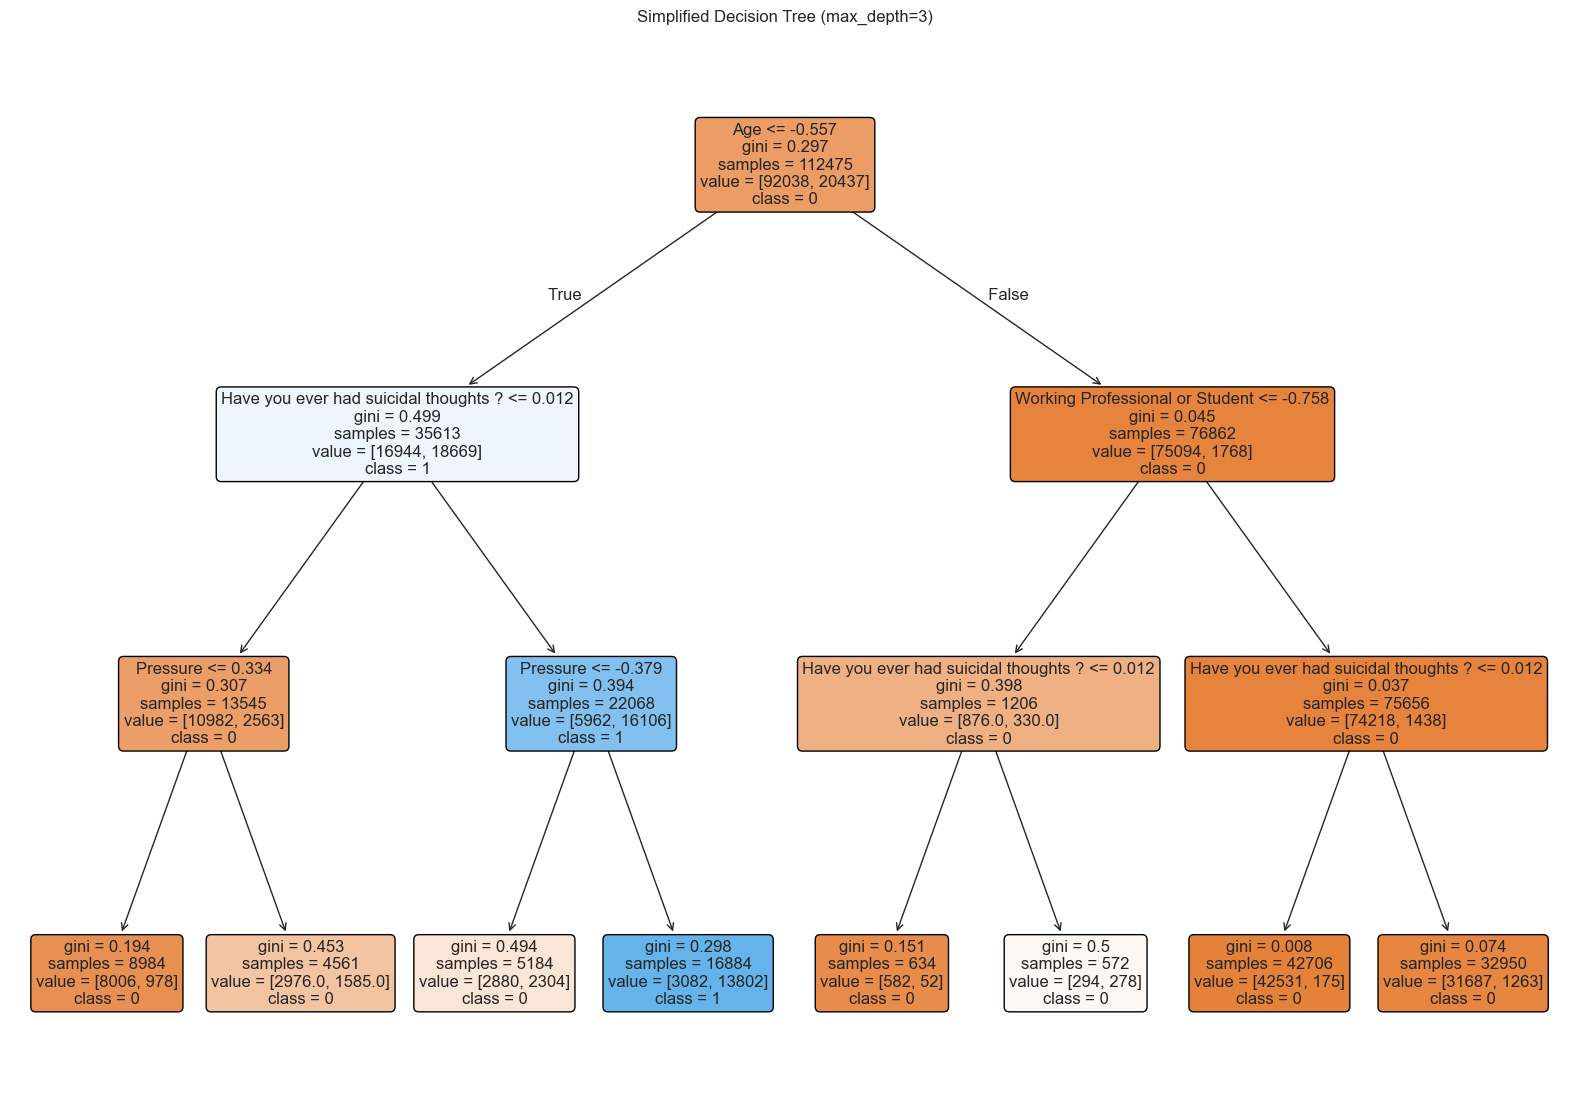

In [53]:
small_tree = DecisionTreeClassifier(max_depth=3, random_state=42)
small_tree.fit(X_train, y_train)

plt.figure(figsize=(20, 14))
plot_tree(small_tree,
          feature_names=X_train.columns,
          class_names=[str(cls) for cls in small_tree.classes_],
          filled=True,
          rounded=True,
          fontsize=12)
plt.title("Simplified Decision Tree (max_depth=3)")
plt.savefig('model_analysis_graphs/simplified_decision_tree.png')
plt.show()

#### Most Influential Features
This plot highlights the top 10 features that most significantly influence the **Decision Tree** model's predictions, indicating what factors are strongest drivers in the model's decision-making process.
In this case **Age** is the most influential.

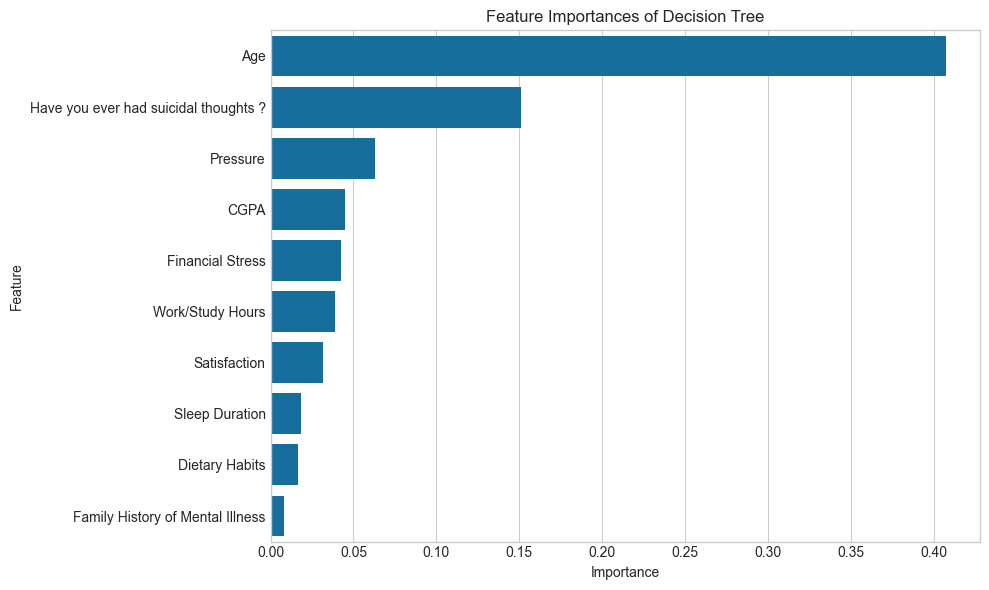

In [67]:
importances = dt_model.feature_importances_
features = X_train.columns

fi_df = pd.DataFrame({'Feature': features, 'Importance': importances}).sort_values('Importance', ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=fi_df)
plt.title('Feature Importances of Decision Tree')
plt.tight_layout()
plt.savefig('model_analysis_graphs/dt_feature_importance.png')
plt.show()

### k-Nearest Neighbors (k-NN)
An instance-based model that predicts the label based on the majority class among the k-nearest training samples in the feature space.

#### Checking Optimal K
Before comparing with other models, we want to garantee we are using the best number of **K** Neighbors.
We concluded that **5** is the best value. 

In [60]:
# Testing the model with different k values (1 - 15)
k_values = list(range(1, 16, 2)) 

# Store results 
cv_accuracies = []
train_times = []
test_times = []
best_k = -1
highest_accuracy = 0

# Loop through k values, train, evaluate, and store results 
print("Evaluating k-NN for different k values...")
for k in k_values:
    print(f"  Testing k = {k}...")
    knn_model = KNeighborsClassifier(n_neighbors=k)

    cv_scores = cross_val_score(knn_model, X_train, y_train, cv=5, scoring='accuracy')
    mean_accuracy = cv_scores.mean()
    cv_accuracies.append(mean_accuracy)

    if mean_accuracy > highest_accuracy:
        highest_accuracy = mean_accuracy
        best_k = k

    start_train = time.time()
    knn_model.fit(X_train, y_train)
    train_time = time.time() - start_train
    train_times.append(train_time)

    start_test = time.time()
    y_pred_knn = knn_model.predict(X_train)
    test_time = time.time() - start_test
    test_times.append(test_time)

print(f"\nOptimal k from CV: {best_k} with mean accuracy: {highest_accuracy:.4f}")

Evaluating k-NN for different k values...
  Testing k = 1...
  Testing k = 3...
  Testing k = 5...
  Testing k = 7...
  Testing k = 9...
  Testing k = 11...
  Testing k = 13...
  Testing k = 15...

Optimal k from CV: 5 with mean accuracy: 0.8970


##### Accuracy Plot Of Best K
We can see that with increasing values of **K**, it improves until hitting **5 neighbors**. After hitting that treshold it just keeps getting worst.

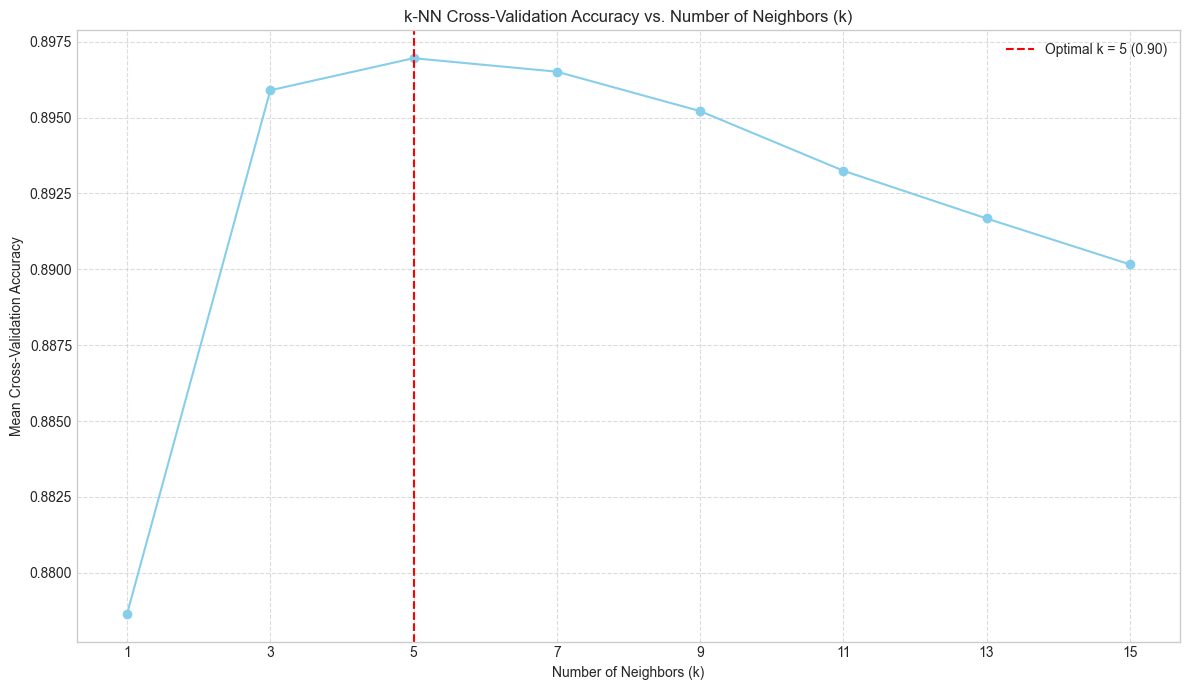

In [ ]:
plt.figure(figsize=(12, 7))
plt.plot(k_values, cv_accuracies, marker='o', linestyle='-', color='skyblue')
plt.title('k-NN Cross-Validation Accuracy vs. Number of Neighbors (k)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Mean Cross-Validation Accuracy')
plt.xticks(k_values) 
plt.grid(True, linestyle='--', alpha=0.7)
plt.axvline(x=best_k, color='red', linestyle='--', label=f'Optimal k = {best_k} ({highest_accuracy:.2f})')
plt.legend()
plt.tight_layout()
plt.savefig('model_analysis_graphs/knn_k_vs_accuracy_plot.png')
plt.show()

##### Store Best K Train/Testing Info
Finally we store the values of the best K of the Model.

In [61]:
cv_scores_knn = cross_val_score(knn_model, X_train, y_train, cv=5, scoring='accuracy')

# Train k-NN
start_train = time.time()
knn_model.fit(X_train, y_train)
train_time_knn = time.time() - start_train

# Test k-NN
start_test = time.time()
y_pred_knn = knn_model.predict(X_test)
test_time_knn = time.time() - start_test

# Evaluation
print("k-NN Results:")
print(classification_report(y_test, y_pred_knn))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_knn))

k-NN Results:
              precision    recall  f1-score   support

           0       0.92      0.95      0.94     23010
           1       0.74      0.65      0.69      5109

    accuracy                           0.89     28119
   macro avg       0.83      0.80      0.81     28119
weighted avg       0.89      0.89      0.89     28119

Confusion Matrix:
[[21820  1190]
 [ 1805  3304]]


### Support Vector Machine (SVM)
A model that finds the hyperplane which best separates the classes in a high-dimensional space. We used an RBF kernel for non-linear boundaries. This model can have a **better accuracy**, however it's **very slow compared** to the others.

In [ ]:
cv_scores_svm = cross_val_score(svm_model, X_train, y_train, cv=5, scoring='accuracy')

# Train SVM
start_train = time.time()
svm_model.fit(X_train, y_train)
train_time_svm = time.time() - start_train

# Test SVM
start_test = time.time()
y_pred_svm = svm_model.predict(X_test)
test_time_svm = time.time() - start_test

# Evaluation
print("SVM Results:")
print(classification_report(y_test, y_pred_svm))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm))

SVM Results:
              precision    recall  f1-score   support

           0       0.96      0.97      0.96     23010
           1       0.85      0.81      0.83      5109

    accuracy                           0.94     28119
   macro avg       0.90      0.89      0.90     28119
weighted avg       0.94      0.94      0.94     28119

Confusion Matrix:
[[22272   738]
 [  951  4158]]


### LightGBM (Light Gradient Boosting Machine)
A fast, distributed, high-performance gradient boosting framework based on decision tree algorithms. It's optimized for speed and efficiency and performs well on large datasets. It works by building many individual decision trees to learn from and correct the errors of previous trees.

In [71]:
cv_scores_lgbm = cross_val_score(lgbm_model, X_train, y_train, cv=5, scoring='accuracy')

# Train LightGBM
start_train = time.time()
lgbm_model.fit(X_train, y_train)
train_time_lgbm = time.time() - start_train

# Test LightGBM
start_test = time.time()
y_pred_lgbm = lgbm_model.predict(X_test)
test_time_lgbm = time.time() - start_test

# Evaluation
print("LightGBM Results:")
print(classification_report(y_test, y_pred_lgbm))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_lgbm))

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 16350, number of negative: 73630
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004651 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 617
[LightGBM] [Info] Number of data points in the train set: 89980, number of used features: 106
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.181707 -> initscore=-1.504825
[LightGBM] [Info] Start training from score -1.504825
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 16350, number of negative: 73630
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006599 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_c

#### Most Influential Features
This plot highlights the top 10 features that most significantly influence the **LightGBM** model's predictions, indicating what factors are strongest drivers in the model's decision-making process.
As well as the **Decision Tree**, it makes sense for the **Age** to be the top 1, because both use **Decision Tree's**, for the selection of the best route, however the **LigthGBM**, uses not just one but many of them. For that reason, while still **sharing the most influential feature**, the percentage of the importance is different as well as the order of the other features' importance.

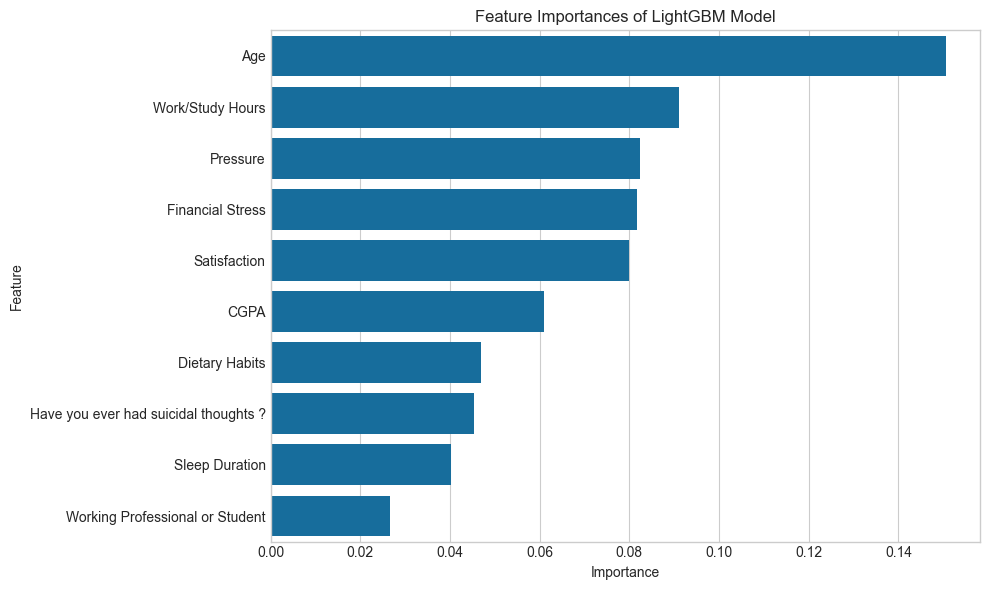

In [72]:
importances = lgbm_model.feature_importances_
features = X_train.columns

normalized_importances = importances / importances.sum()

fi_df_lgbm = pd.DataFrame({'Feature': features, 'Importance': normalized_importances}).sort_values('Importance', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=fi_df_lgbm.head(10)) 
plt.title('Feature Importances of LightGBM Model')
plt.tight_layout()
plt.savefig('model_analysis_graphs/lgbm_feature_importance.png')
plt.show()

### CatBoost
A gradient boosting algorithm, designed to handle categorical features automatically and efficiently, offering good accuracy with less parameter tuning. This is very similar to **LightGBM**, however has the ability to handle **categorical features** automatically, without the need of manual preprocessing.

In [76]:
cv_scores_catboost = cross_val_score(catboost_model, X_train, y_train, cv=5, scoring='accuracy')

# Train CatBoost
start_train = time.time()
catboost_model.fit(X_train, y_train)
train_time_catboost = time.time() - start_train

# Test CatBoost
start_test = time.time()
y_pred_catboost = catboost_model.predict(X_test)
test_time_catboost = time.time() - start_test

# Evaluation
print("CatBoost Results:")
print(classification_report(y_test, y_pred_catboost))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_catboost))

CatBoost Results:
              precision    recall  f1-score   support

           0       0.96      0.97      0.96     23010
           1       0.85      0.82      0.83      5109

    accuracy                           0.94     28119
   macro avg       0.90      0.89      0.90     28119
weighted avg       0.94      0.94      0.94     28119

Confusion Matrix:
[[22255   755]
 [  910  4199]]


#### Most Influential Features
Yet again, the **Age** is the most influential feature, and not surprinsingly its **feature distribution** also differs from the others quite a bit. This is expected because every one of them creates **Decision trees**, but with personalized tweaks.

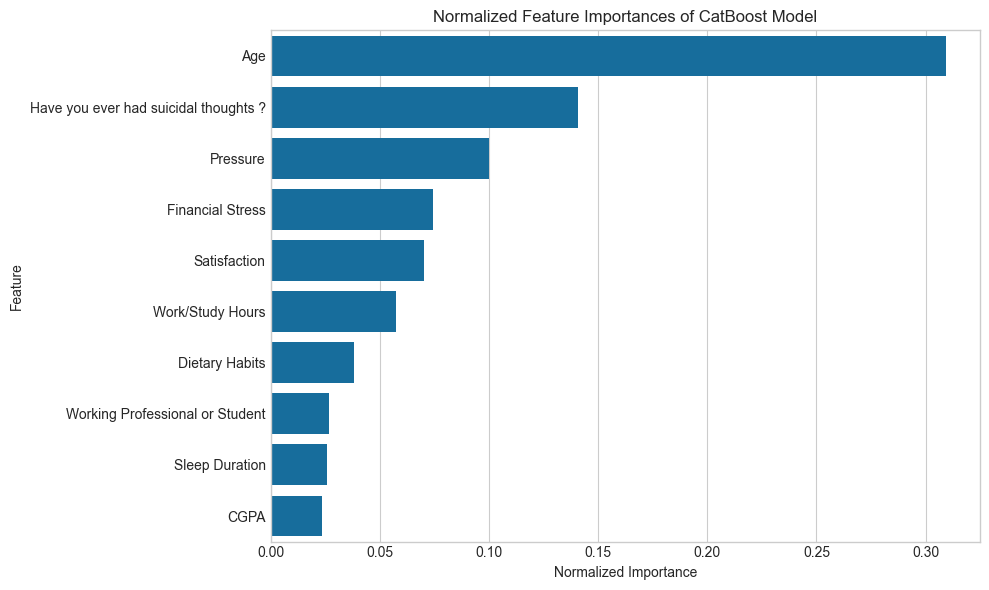

In [77]:
importances = catboost_model.get_feature_importance() 
features = X_train.columns

normalized_importances = importances / importances.sum()

fi_df_catboost = pd.DataFrame({'Feature': features, 'Importance': normalized_importances}).sort_values('Importance', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=fi_df_catboost.head(10)) 
plt.title('Normalized Feature Importances of CatBoost Model')
plt.xlabel('Normalized Importance')
plt.tight_layout()
plt.savefig('model_analysis_graphs/catboost_normalized_feature_importance.png')
plt.show()

### Random Forest
An ensemble learning method that fits multiple decision trees on various sub-samples of the dataset and averages them to improve accuracy and control overfitting. Each tree is trained on a random subset of the data and considers only a random subset of features for splitting, which ensures diversity among the trees.

In [78]:
cv_scores_rf = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='accuracy')

# Train Random Forest
start_train = time.time()
rf_model.fit(X_train, y_train)
train_time_rf = time.time() - start_train

# Test Random Forest
start_test = time.time()
y_pred_rf = rf_model.predict(X_test)
test_time_rf = time.time() - start_test

# Evaluation
print("Random Forest Results:")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

Random Forest Results:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96     23010
           1       0.86      0.79      0.82      5109

    accuracy                           0.94     28119
   macro avg       0.90      0.88      0.89     28119
weighted avg       0.94      0.94      0.94     28119

Confusion Matrix:
[[22336   674]
 [ 1098  4011]]


#### Most Influential Features
Similar to the other models that use the **Decision trees**, this one also has similar feature importance, matching **Age**, as the most important one. 

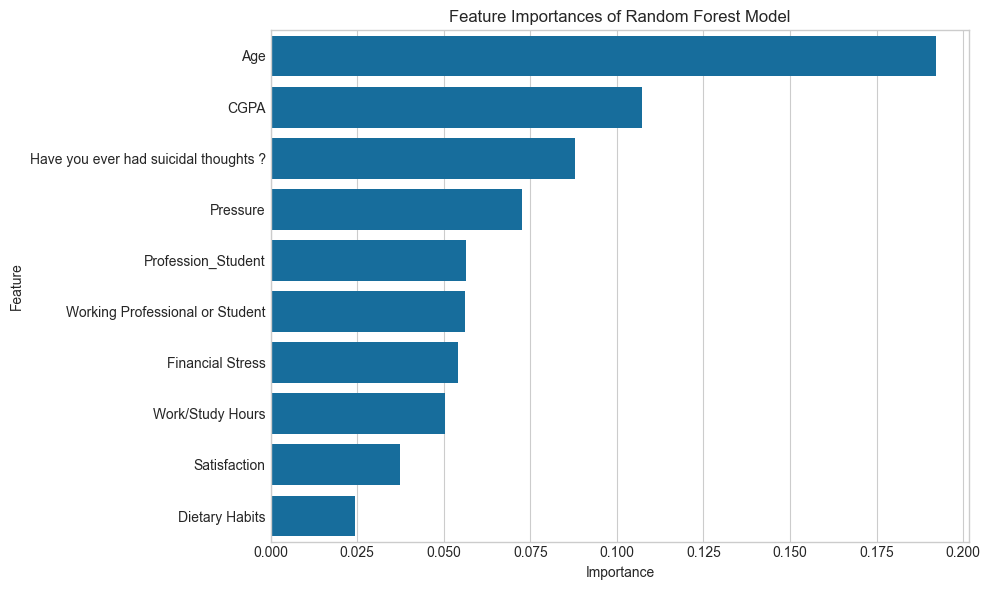

In [79]:
importances = rf_model.feature_importances_ 
features = X_train.columns

fi_df_rf = pd.DataFrame({'Feature': features, 'Importance': importances}).sort_values('Importance', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=fi_df_rf.head(10)) 
plt.title('Feature Importances of Random Forest Model')
plt.xlabel('Importance') 
plt.tight_layout()
plt.savefig('model_analysis_graphs/rf_feature_importance.png')
plt.show()

## 5. Evaluation and comparison of results
In this section, we evaluate and compare the performance of the machine learning models we trained. The goal is to determine which algorithm performs best at predicting whether a person is likely to suffer from depression based on the available data.

We assess each model using the following standard metrics:

- **Accuracy**: Overall correctness of the model.

- **Precision**: How many predicted positive cases were actually positive.

- **Recall**: How many actual positive cases were correctly identified.

- **F1 Score**: A balance between precision and recall.

- **Confusion Matrix**: Breakdown of correct vs incorrect predictions.
  
  This value will be translated to:
  - **True Positive (TP)**: Model correctly predicted the person has depression.
  - **True Negative (TN)**: Model correctly predicted the person does not have depression.
  - **False Positive (FP)**: Model predicted depression, but the person does not have it.
  - **False Negative (FN)**: Model predicted no depression, but the person actually has it.

- **Training Time**: How long the model took to learn from the data.

- **Testing Time**: How long the model took to make predictions.

### Store Evaluation Results
After computing each model we store each relevant metric to a csv file.

In [ ]:
def flatten_confusion_matrix(cm, labels=["TN", "FP", "FN", "TP"]):
    cm_flat = cm.ravel()
    return dict(zip(labels, cm_flat))

def evaluate_model(name, y_true, y_pred, train_time, test_time, cv_scores):
    scores = {
        "Model": name,
        "Average Accuracy": cv_scores.mean(),
        "Precision": precision_score(y_true, y_pred),
        "Recall": recall_score(y_true, y_pred),
        "F1 Score": f1_score(y_true, y_pred),
        "Train Time (s)": round(train_time, 4),
        "Test Time (s)": round(test_time, 4),
        "CV Accuracy Scores": cv_scores
    }
    cm = confusion_matrix(y_true, y_pred)
    scores.update(flatten_confusion_matrix(cm))
    return scores

results = [
    evaluate_model("Decision Tree", y_test, y_pred_dt, train_time_dt, test_time_dt, cv_scores_dt),
    evaluate_model("k-NN", y_test, y_pred_knn, train_time_knn, test_time_knn, cv_scores_knn),
    evaluate_model("SVM", y_test, y_pred_svm, train_time_svm, test_time_svm, cv_scores_svm),
    evaluate_model("LightGBM", y_test, y_pred_lgbm, train_time_lgbm, test_time_lgbm, cv_scores_lgbm),
    evaluate_model("CatBoost", y_test, y_pred_catboost, train_time_catboost, test_time_catboost, cv_scores_catboost),
    evaluate_model("Random Forest", y_test, y_pred_rf, train_time_rf, test_time_rf, cv_scores_rf),
]

results_df = pd.DataFrame(results)

print("\n--- Model Comparison Table ---")
print(results_df)

results_df.to_csv("model_comparison_summary.csv", index=False)



--- Model Comparison Table ---
           Model  Average Accuracy  Precision    Recall  F1 Score  \
0  Decision Tree          0.907366   0.751997  0.755529  0.753759   
1           k-NN          0.890162   0.735202  0.646702  0.688118   
2            SVM          0.937195   0.849265  0.813858  0.831184   
3       LightGBM          0.938164   0.840191  0.827363  0.833728   
4       CatBoost          0.939106   0.847598  0.821883  0.834542   
5  Random Forest          0.934634   0.856137  0.785085  0.819073   

   Train Time (s)  Test Time (s)  \
0          1.4297         0.0239   
1          0.1086         6.5189   
2        405.8887       103.6387   
3          0.7094         0.0241   
4          7.8055         0.0149   
5         18.2255         0.6820   

                                  CV Accuracy Scores     TN    FP    FN    TP  
0  [0.90597911 0.90660147 0.90891309 0.90966882 0...  21737  1273  1249  3860  
1  [0.8873972  0.89024228 0.88868637 0.89246499 0...  21820  1190  1805

### Load Results
If needed reload the results file.

In [ ]:
try:
    if results_df.empty:
        results_df = pd.read_csv("model_comparison_summary.csv")
except NameError:
    results_df = pd.read_csv("model_comparison_summary.csv")

### Comparing Results
Finally we compare results to check what is the model with the best performance/evaluation.

#### Accuracy Comparison
This visualization compares the **cross-validation accuracy** across all models using two perspectives, the left **box plot**, shows the distribution of accuracy across the 5 CV folds, highlighting variance and consistency. The one on the right, shows the average accuracy per model, allowing a quick performance ranking.

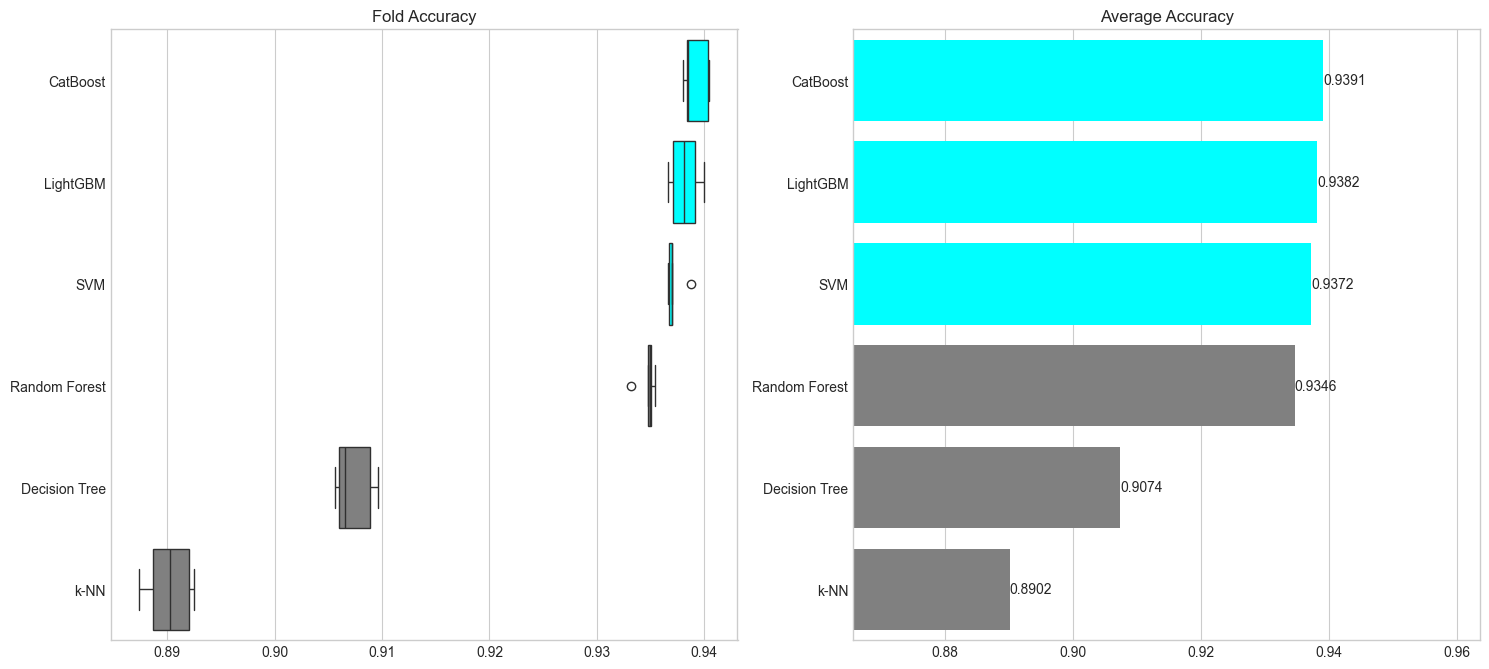

In [ ]:
def parse_cv_scores(score):
    if isinstance(score, str):  
        return np.array([float(val) for val in score.strip("[]").split()])
    return score 

results_df["CV Accuracy Scores"] = results_df["CV Accuracy Scores"].apply(parse_cv_scores)

scores = pd.DataFrame({row["Model"]: row["CV Accuracy Scores"] for _, row in results_df.iterrows()})

mean_scores = scores.mean().sort_values(ascending=False)
order = mean_scores.index.tolist()

min_score = mean_scores.min()
max_score = mean_scores.max()
padding = (max_score - min_score) * 0.5
lower_limit = min_score - padding
upper_limit = max_score + padding

# Plotting
fig, axs = plt.subplots(1, 2, figsize=(15, scores.shape[1] * 0.3 + 5))

# Boxplot
boxplot = sns.boxplot(data=scores, order=order, ax=axs[0], orient='h', color='grey')
axs[0].set_title('Fold Accuracy')
axs[0].set_xlabel('')
axs[0].set_ylabel('')

# Barplot
barplot = sns.barplot(x=mean_scores.values, y=mean_scores.index, ax=axs[1], color='grey')
axs[1].set_title('Average Accuracy')
axs[1].set_xlabel('')
axs[1].set_xlim(left=lower_limit, right=upper_limit)
axs[1].set_ylabel('')

top_n = 3
for i, (score, model) in enumerate(zip(mean_scores.values, mean_scores.index)):
    color = 'cyan' if i < top_n else 'grey'
    barplot.patches[i].set_facecolor(color)
    boxplot.patches[i].set_facecolor(color)
    barplot.text(score, i, round(score, 4), va='center')


plt.tight_layout()
plt.savefig('model_analysis_graphs/cv_accuracy_comparison.png')
plt.show()

##### **Conclusion**
The models show that **CatBoost**, **LightGBM**, and **SVM** are the top performers with the highest accuracies for this dataset. These models excel by building complex decision boundaries and ensembles of trees that effectively correct errors and manage diverse data patterns. **Age** consistently stands out as the most crucial feature influencing predictions across all models.

#### Time Comparison

##### Training time plot

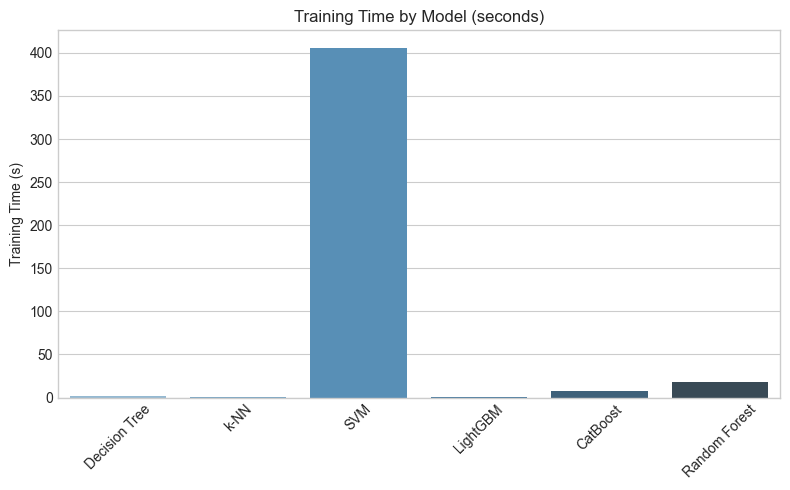

In [ ]:
plt.figure(figsize=(8, 5))
sns.barplot(data=results_df, x='Model', y='Train Time (s)', palette='Blues_d')
plt.title('Training Time by Model (seconds)')
plt.ylabel('Training Time (s)')
plt.xlabel('')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### **Conclusion**
While being one of the best models,**Support Vector Machine (SVM)** exhibits a dramatically longer training duration exceeding **400 seconds**. In contrast, all other models like **Decision Tree**, **k-NN**, **LightGBM**, **CatBoost**, and **Random Forest** complete training in less than 50 seconds. This is mainly due to the SVM's complexity and the need for extensive computations to find the optimal hyperplane, especially in high-dimensional spaces. When using the **RBF kernel**, the SVM's training time increases significantly, making it less suitable for large datasets compared to tree-based models.

##### Prediction time plot

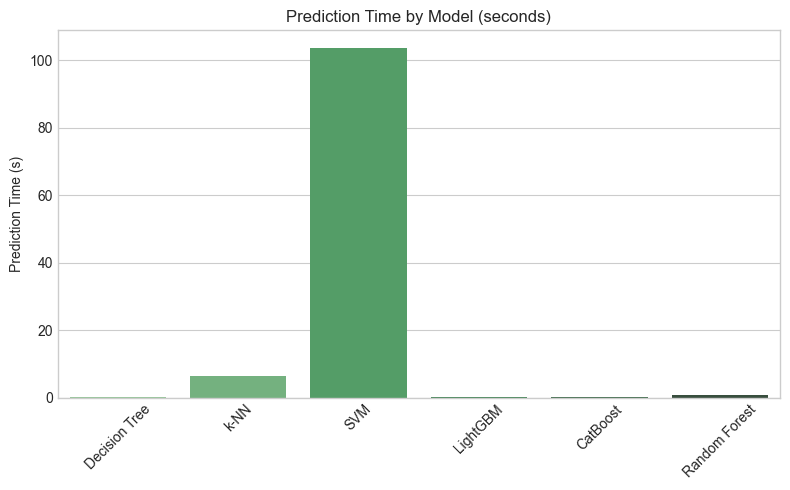

In [127]:
plt.figure(figsize=(8, 5))
sns.barplot(data=results_df, x='Model', y='Test Time (s)', palette='Greens_d')
plt.title('Prediction Time by Model (seconds)')
plt.ylabel('Prediction Time (s)')
plt.xlabel('')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### **Conclusion**
As seen above, we should expect **SVM** to still be more costly in time while predicting because it needs to perform complex calculations for every prediction, unlike during its training phase. However, **k-NN** shows that it takes more time predicting than training because its **"training"** is just storing data, with all the computational work of finding neighbors happening only when a new prediction is requested.

#### ROC Curves
Visualize the trade-off between true positive rate (sensitivity) and false positive rate (specificity) for different classification thresholds. The AUC (Area Under the Curve) score summarizes the overall ability of the model to distinguish between classes — the closer to 1, the better.

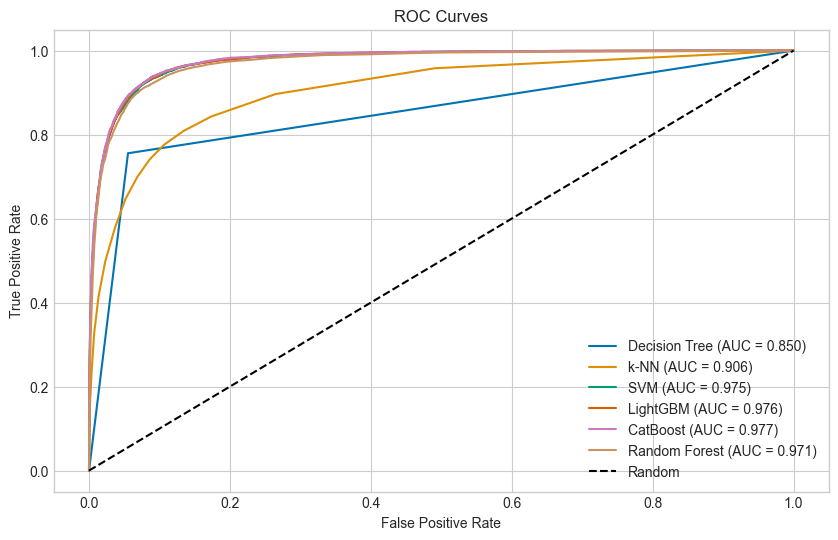

In [91]:
plt.figure(figsize=(10, 6))

def plot_roc_curve(y_true, y_score, model_name):
    fpr, tpr, _ = roc_curve(y_true, y_score)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.3f})')

if hasattr(dt_model, "predict_proba"):
    plot_roc_curve(y_test, dt_model.predict_proba(X_test)[:, 1], "Decision Tree")

if hasattr(knn_model, "predict_proba"):
    plot_roc_curve(y_test, knn_model.predict_proba(X_test)[:, 1], "k-NN")

if hasattr(svm_model, "decision_function"):
    plot_roc_curve(y_test, svm_model.decision_function(X_test), "SVM")

if hasattr(lgbm_model, "predict_proba"):
    plot_roc_curve(y_test, lgbm_model.predict_proba(X_test)[:, 1], "LightGBM")

if hasattr(catboost_model, "predict_proba"):
    plot_roc_curve(y_test, catboost_model.predict_proba(X_test)[:, 1], "CatBoost")

if hasattr(rf_model, "predict_proba"):
    plot_roc_curve(y_test, rf_model.predict_proba(X_test)[:, 1], "Random Forest")

plt.plot([0, 1], [0, 1], 'k--', label='Random')

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves")
plt.legend(loc="lower right")
plt.grid(True)
plt.savefig('model_analysis_graphs/roc_curves.png')
plt.show()

##### **Conclusion**
The ROC curve analysis confirms that **CatBoost (AUC ~0.977)**, **LightGBM (AUC ~0.976)**, and **SVM (AUC ~0.975)** are the top-performing models for this dataset, with Random Forest closely following (AUC ~0.971). These ensemble and margin-based methods significantly outperform the simpler Decision Tree (AUC ~0.850) and k-NN (AUC ~0.906) models. Their superior performance is due to their ability to build complex, robust decision boundaries and effectively learn from data patterns.

Across all models, **'Age' consistently emerges as the most influential feature**. While 'Age' maintains its primary importance, the detailed feature importance plots show that more sophisticated ensemble models like LightGBM utilize a broader set of features (e.g., 'Work/Study Hours', 'Pressure', 'Financial Stress', 'Satisfaction') more uniformly across their many trees, contributing to their higher overall predictive power, unlike a shallow Decision Tree that relies heavily on a few early splits.

#### Learning Curves
Learning curves plot model performance on training and validation sets as the training sample size increases. They provide insight into how well a model is learning and whether it suffers from underfitting or overfitting. Ideally, training and validation scores should converge to a high accuracy (or low error), indicating good generalization.

In [94]:
def plot_learning_curve(model, X, y, model_name, scoring='accuracy', cv=5, train_sizes=np.linspace(0.1, 1.0, 10)):
    """
    Plots training and validation scores vs number of training samples with consistent bounds.
    """
    train_sizes, train_scores, valid_scores = learning_curve(
        model, X, y, cv=cv, scoring=scoring, train_sizes=train_sizes, n_jobs=-1
    )
    
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    valid_mean = np.mean(valid_scores, axis=1)
    valid_std = np.std(valid_scores, axis=1)
    
    plt.figure(figsize=(8, 6))
    plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Training score')
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='blue')
    
    plt.plot(train_sizes, valid_mean, 'o-', color='orange', label='Validation score')
    plt.fill_between(train_sizes, valid_mean - valid_std, valid_mean + valid_std, alpha=0.1, color='orange')
    
    plt.title(f'Learning Curve: {model_name}')
    plt.xlabel('Training Set Size')
    plt.ylabel(scoring.capitalize())
    plt.ylim(0.5, 1.01)  
    plt.legend(loc='best')
    plt.grid(True)
    path = f'model_analysis_graphs/learning_curve_{model_name.replace(" ", "_").lower()}.png'
    plt.savefig(path, bbox_inches='tight')
    plt.show()

##### Learning Curve Decision Tree

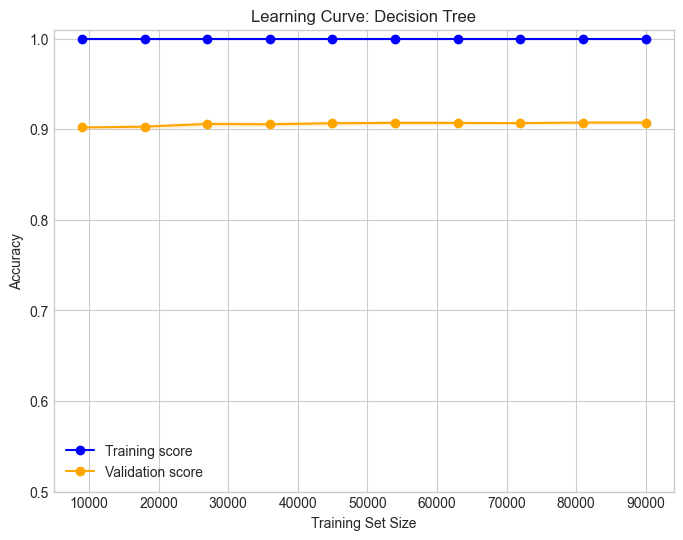

In [95]:
plot_learning_curve(dt_model, X_train, y_train, "Decision Tree")

##### **Conclusion**
The learning curve for the **Decision Tree** clearly indicates **overfitting**, as its perfect training score significantly exceeds its much lower validation score. This typically happens because the **tree might grow too deep** or is not sufficiently **"pruned"**, causing it to create overly specific rules that fit the training data's noise but fail to generalize to new data.

##### Learning Curve k-NN

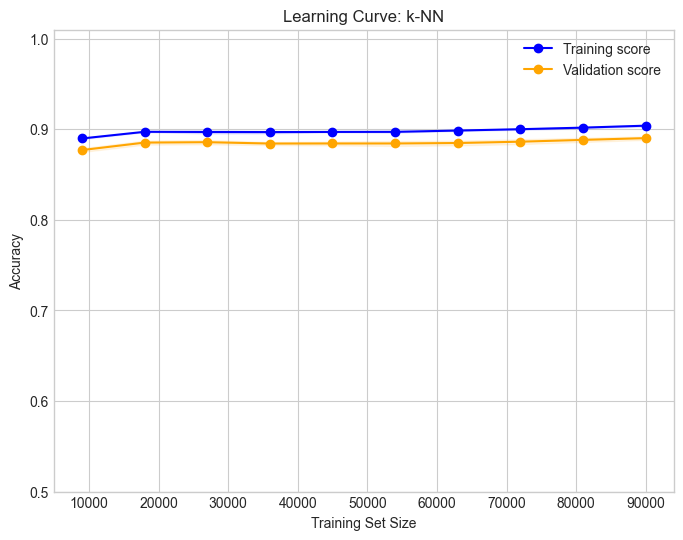

In [96]:
plot_learning_curve(knn_model, X_train, y_train, "k-NN")

##### **Conclusion**

The learning curve for the **k-NN model** shows that both the **training** and **validation** scores are relatively close and remain fairly consistent across different training set sizes. This suggests that the **k-NN model** is neither significantly **overfitting** nor **underfitting** the data. The model's performance doesn't drastically improve with larger training sets, indicating the **inherent complexity** of the algorithm might be limiting further gains in accuracy.

##### Learning Curve SVM

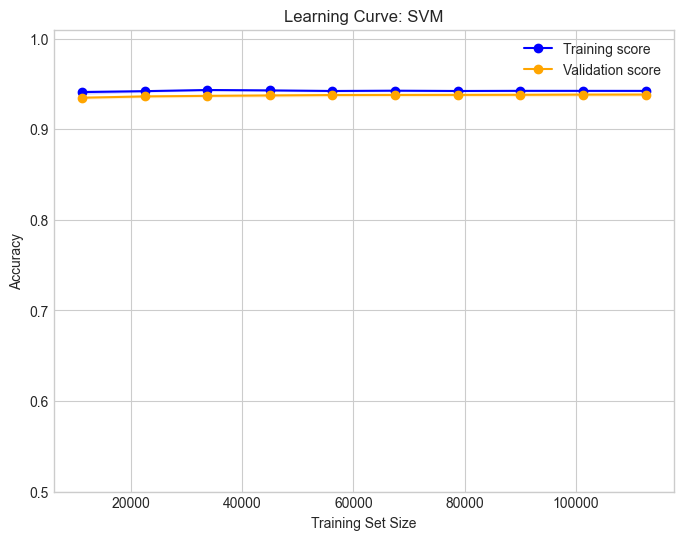

In [128]:
plot_learning_curve(svm_model, X_train, y_train, "SVM")

##### **Conclusion**
The learning curve for the SVM model reveals a **highly stable and well-generalizing performance**. Both the **training and validation scores are remarkably close** (around 0.94 and 0.93 respectively) and **remain consistent** as the training set size increases. This minimal gap strongly indicates that the SVM is **not significantly overfitting** to the training data. Furthermore, the flat nature of both curves suggests that the model's performance has likely **converged**, meaning additional training data might not yield substantial accuracy improvements.

##### Learning Curve LightGBM

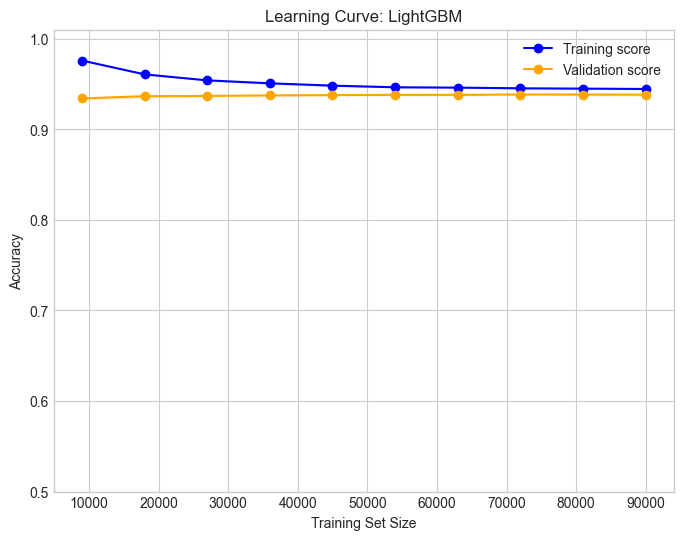

In [98]:
plot_learning_curve(lgbm_model, X_train, y_train, "LightGBM")

##### **Conclusion**
The learning curve for the LightGBM model shows a **very high and stable performance** across all training set sizes. The **training score starts high and gently decreases**, while the **validation score is consistently high and very close to the training score**. This minimal gap indicates that the LightGBM model is **generalizing exceptionally well** and is **not significantly overfitting** to the training data. The curves also suggest that the model's performance has largely **converged**, meaning further increases in training data size are unlikely to yield substantial accuracy improvements.

##### Learning Curve CatBoost

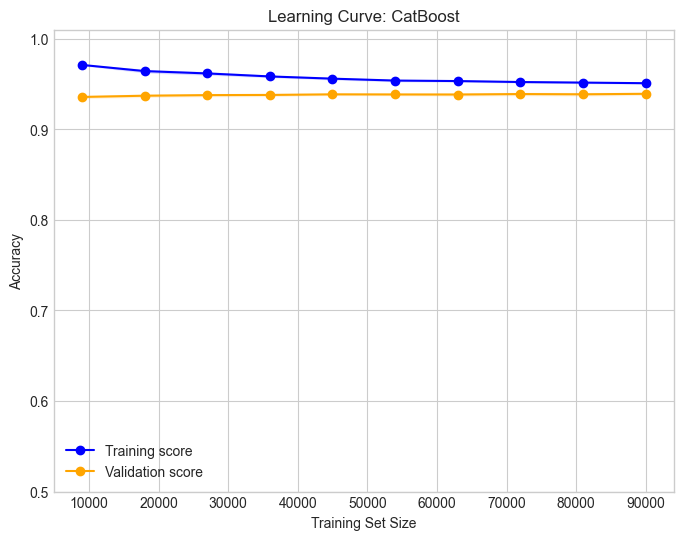

In [99]:
plot_learning_curve(catboost_model, X_train, y_train, "CatBoost")

##### **Conclusion**
Examining the CatBoost learning curve, we observe a model demonstrating **robust and consistent accuracy**. The **training accuracy begins strong and exhibits a slight, graceful descent**, while the **validation accuracy maintains a high level, closely mirroring the training performance**. This narrow convergence of scores signifies that the CatBoost model is **effectively learning without overfitting** to the intricacies of the training set. The nearly flat trajectory of both curves further implies that the model has reached its **performance plateau**, and thus, introducing more data points is unlikely to drastically enhance its predictive capabilities.

##### Learning Curve Random Forest

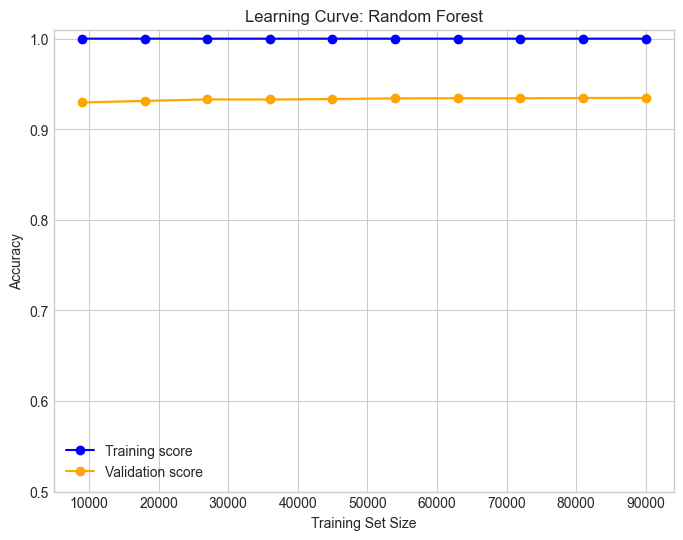

In [100]:
plot_learning_curve(rf_model, X_train, y_train, "Random Forest")

##### **Conclusion**
For the Random Forest learning curve, it shows a **very high training score (perfect 1.00)** that remains constant. Meanwhile, the **validation score stays notably lower (around 0.93)**, also consistent. This clear and persistent difference between the two curves indicates the model is **overfitting** to the training data. Similar to the Decision Tree, the flat nature of both lines suggests that simply adding more training data won't significantly improve its generalization ability.

### Final Analysis Conclusion

Based on a comprehensive evaluation across various performance metrics and model behaviors, the **CatBoost model stands out as the optimal choice** for this classification task.

CatBoost consistently achieved the **highest average accuracy** (around 0.9391) and the **best ROC AUC score** (approximately 0.977) among all models evaluated, closely followed by LightGBM and SVM. This superior predictive power stems from its advanced gradient boosting techniques, which effectively learn complex patterns and robustly handle categorical features. Furthermore, its learning curve demonstrates **excellent generalization**, with high and tightly aligned training and validation scores, indicating minimal overfitting. Crucially, despite its high accuracy, CatBoost maintains **exceptionally fast prediction times**, appearing almost instantaneous compared to the very slow SVM.

Across all models, **'Age' was consistently identified as the most impactful feature**, underscoring its primary role in the predictions. While models like the Decision Tree and Random Forest showed signs of overfitting on their learning curves, and k-NN's performance was stable but lower, CatBoost provides the best balance of **high accuracy, strong generalization, and computational efficiency**, making it the most suitable model for deployment.

### Kagle (Extra)
Here we are testing how we have done in kaggle so we can check if our solution would be viable or not. The model chosen was **Catboost**, as it showed to be the best overall.

#### Preprocess Kaggle Data 
We use the same pipeline we used to filter data. One thing we have to change in **test** is keep the 'Sleep Duration' and 'Dietary Habits' invalid rows, and replace them by the categorical **average** of our data.

In [ ]:
def preprocess_kaggle_data(train_path: str, test_path: str):
    df_train = pd.read_csv(train_path)
    df_test = pd.read_csv(test_path)

    # Drop 'Name' and 'id' columns
    df_train.drop(columns=['Name', 'id'], inplace=True)
    df_test.drop(columns=['Name', 'id'], inplace=True)

    # Filter categorical columns in train (same filtering logic could be applied to test if needed)
    top4_sleep = ['Less than 5 hours', '7-8 hours', 'More than 8 hours', '5-6 hours']
    top3_diet = ['Moderate', 'Unhealthy', 'Healthy']

    df_train = df_train[df_train['Sleep Duration'].isin(top4_sleep) & df_train['Dietary Habits'].isin(top3_diet)]

    # For test, keep only rows with valid values too, or you can fill/adjust as needed
    df_test['Sleep Duration'] = df_test['Sleep Duration'].apply(lambda x: x if x in top4_sleep else '7-8 hours')  
    df_test['Dietary Habits'] = df_test['Dietary Habits'].apply(lambda x: x if x in top3_diet else 'Moderate') 
    
    # Create 'Satisfaction' column
    df_train["Satisfaction"] = df_train.apply(
        lambda row: row["Job Satisfaction"] if row['Working Professional or Student'] == 'Working Professional' 
        else row['Study Satisfaction'], axis=1
    )
    df_test["Satisfaction"] = df_test.apply(
        lambda row: row["Job Satisfaction"] if row['Working Professional or Student'] == 'Working Professional' 
        else row['Study Satisfaction'], axis=1
    )

    # Fill missing 'Satisfaction'
    is_wp_train = df_train['Working Professional or Student'] == 'Working Professional'
    is_st_train = df_train['Working Professional or Student'] == 'Student'

    mean_sat_wp = round(df_train[(is_wp_train) & df_train["Satisfaction"].notna()]["Satisfaction"].mean())
    mean_sat_st = round(df_train[(is_st_train) & df_train["Satisfaction"].notna()]["Satisfaction"].mean())

    df_train.loc[(is_wp_train) & (df_train["Satisfaction"].isna()), "Satisfaction"] = mean_sat_wp
    df_train.loc[(is_st_train) & (df_train["Satisfaction"].isna()), "Satisfaction"] = mean_sat_st

    is_wp_test = df_test['Working Professional or Student'] == 'Working Professional'
    is_st_test = df_test['Working Professional or Student'] == 'Student'

    df_test.loc[(is_wp_test) & (df_test["Satisfaction"].isna()), "Satisfaction"] = mean_sat_wp
    df_test.loc[(is_st_test) & (df_test["Satisfaction"].isna()), "Satisfaction"] = mean_sat_st

    df_train.drop(columns=['Job Satisfaction', 'Study Satisfaction'], inplace=True)
    df_test.drop(columns=['Job Satisfaction', 'Study Satisfaction'], inplace=True)

    # Create and fill 'Pressure' similarly
    df_train['Pressure'] = df_train.apply(
        lambda row: row['Work Pressure'] if row['Working Professional or Student'] == 'Working Professional' 
        else row['Academic Pressure'], axis=1)
    df_test['Pressure'] = df_test.apply(
        lambda row: row['Work Pressure'] if row['Working Professional or Student'] == 'Working Professional' 
        else row['Academic Pressure'], axis=1)

    mean_pr_wp = round(df_train[(is_wp_train) & df_train["Pressure"].notna()]["Pressure"].mean())
    mean_pr_st = round(df_train[(is_st_train) & df_train["Pressure"].notna()]["Pressure"].mean())

    df_train.loc[(is_wp_train) & (df_train["Pressure"].isna()), "Pressure"] = mean_pr_wp
    df_train.loc[(is_st_train) & (df_train["Pressure"].isna()), "Pressure"] = mean_pr_st

    df_test.loc[(is_wp_test) & (df_test["Pressure"].isna()), "Pressure"] = mean_pr_wp
    df_test.loc[(is_st_test) & (df_test["Pressure"].isna()), "Pressure"] = mean_pr_st

    df_train.drop(columns=['Work Pressure', 'Academic Pressure'], inplace=True)
    df_test.drop(columns=['Work Pressure', 'Academic Pressure'], inplace=True)

    # CGPA fill
    df_train.loc[is_st_train, 'CGPA'] = df_train.loc[is_st_train, 'CGPA'].fillna(df_train['CGPA'].median())
    df_train.loc[is_wp_train, 'CGPA'] = df_train.loc[is_wp_train, 'CGPA'].fillna(-1)

    df_test.loc[is_st_test, 'CGPA'] = df_test.loc[is_st_test, 'CGPA'].fillna(df_train['CGPA'].median())  # median from train
    df_test.loc[is_wp_test, 'CGPA'] = df_test.loc[is_wp_test, 'CGPA'].fillna(-1)

    # Profession fill
    df_train.loc[is_st_train, 'Profession'] = df_train.loc[is_st_train, 'Profession'].fillna("Student")
    df_train.loc[is_wp_train, 'Profession'] = df_train.loc[is_wp_train, 'Profession'].fillna("Unemployed")

    df_test.loc[is_st_test, 'Profession'] = df_test.loc[is_st_test, 'Profession'].fillna("Student")
    df_test.loc[is_wp_test, 'Profession'] = df_test.loc[is_wp_test, 'Profession'].fillna("Unemployed")

    # Other fills
    df_train['Dietary Habits'] = df_train['Dietary Habits'].fillna(df_train['Dietary Habits'].mode()[0])
    df_test['Dietary Habits'] = df_test['Dietary Habits'].fillna(df_train['Dietary Habits'].mode()[0])

    df_train['Financial Stress'] = df_train['Financial Stress'].fillna(df_train['Financial Stress'].median())
    df_test['Financial Stress'] = df_test['Financial Stress'].fillna(df_train['Financial Stress'].median())

    df_train['Degree'] = df_train['Degree'].fillna("None")
    df_test['Degree'] = df_test['Degree'].fillna("None")

    # Prepare X and y for train
    y_train = df_train['Depression']
    X_train = df_train.drop(columns=['Depression'])

    # Mappings
    binary_cols = [
        'Gender',
        'Have you ever had suicidal thoughts ?',
        'Family History of Mental Illness',
        'Working Professional or Student'
    ]
    binary_map = {'Yes': 1, 'No': 0, 'Male': 1, 'Female': 0, 'Working Professional': 1, 'Student': 0}

    ordinal_cols = {
        'Sleep Duration': {
            'Less than 5 hours': 0,
            '5-6 hours': 1,
            '7-8 hours': 2,
            'More than 8 hours': 3
        },
        'Dietary Habits': {
            'Unhealthy': 0,
            'Moderate': 1,
            'Healthy': 2
        }
    }

    nominal_cols = ['City', 'Profession', 'Degree']

    # Apply mappings to train and test
    for col in binary_cols:
        X_train[col] = X_train[col].map(binary_map)
        df_test[col] = df_test[col].map(binary_map)

    for col, mapping in ordinal_cols.items():
        X_train[col] = X_train[col].map(mapping)
        df_test[col] = df_test[col].map(mapping)

    # One-hot encoding for nominal columns
    encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
    encoder.fit(X_train[nominal_cols])

    X_train_encoded = encoder.transform(X_train[nominal_cols])
    X_test_encoded = encoder.transform(df_test[nominal_cols])

    encoded_cols = encoder.get_feature_names_out(nominal_cols)
    X_train_encoded = pd.DataFrame(X_train_encoded, columns=encoded_cols, index=X_train.index)
    X_test_encoded = pd.DataFrame(X_test_encoded, columns=encoded_cols, index=df_test.index)

    X_train = X_train.drop(columns=nominal_cols).join(X_train_encoded)
    X_test = df_test.drop(columns=nominal_cols).join(X_test_encoded)

    # Scale features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    X_train = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
    X_test = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

    return X_train, y_train, X_test


#### Kaggle Score
After running and submitting our solution we got a score of **0.94027**.

In [ ]:
X_train, y_train, X_test = preprocess_kaggle_data('data/train.csv', 'data/test.csv')

# Train CatBoost classifier
catboost_model.fit(X_train, y_train)

# Predict on test data
y_pred = catboost_model.predict(X_test)

# For submission, you need the test 'id's from original test csv
test_df = pd.read_csv('data/test.csv')
submission = pd.DataFrame({
    'id': test_df['id'],
    'Depression': y_pred.astype(int)
})

submission.to_csv('kaggle/submission.csv', index=False)

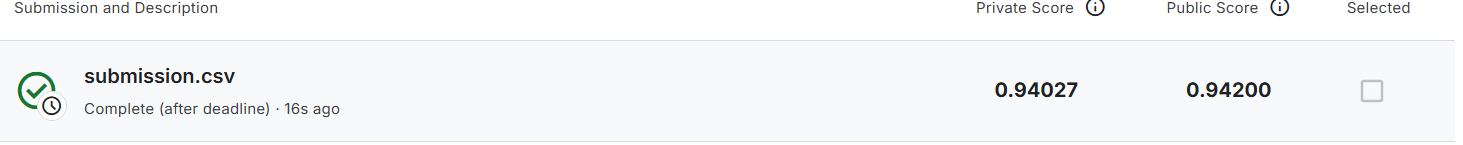